# Week 10 Tutorial SVM


## Question 1 

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. 

### (a) Generate data 
Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows: 

In [1]:
set.seed(1)
x1=runif(500)-0.5
x2=runif(500)-0.5
y=1*(x1^2-x2^2 > 0) 
# save data in a dataframe
data <- data.frame(x1 = x1, x2 = x2, y = y)

### (b) Plot the observations

Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis. 

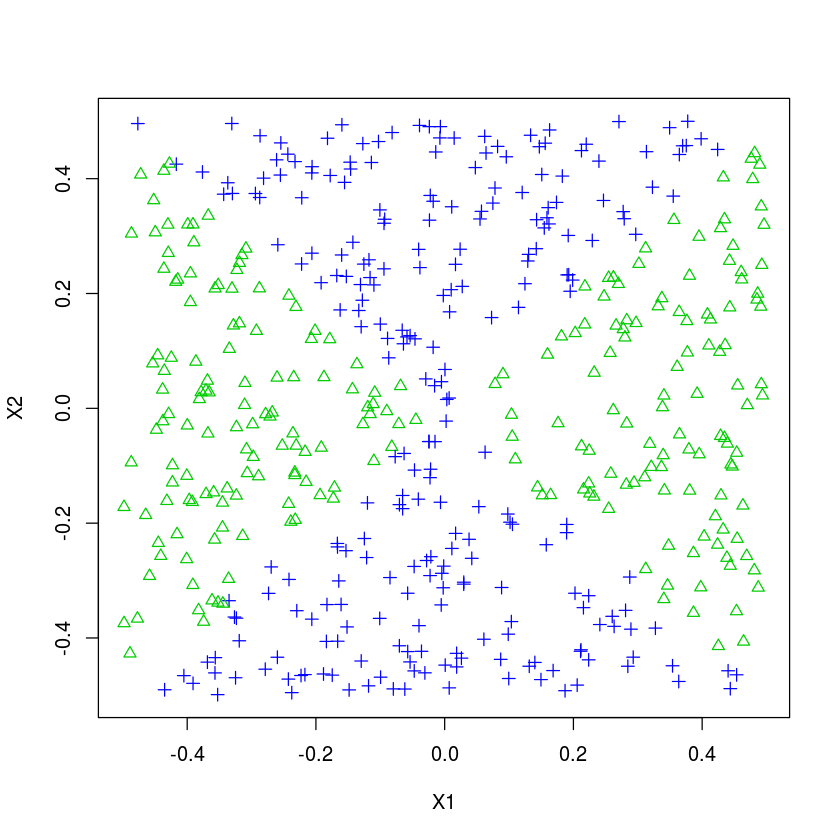

In [2]:
plot(x1, x2, xlab = "X1", ylab = "X2", col = (4 - y), pch = (3 - y))

### c) Logistic regression

Fig a logistic regression model to the data, using X1 and X2 as predictors.

In [3]:
logit.fit <- glm(y ~ x1 + x2, family = "binomial")
summary(logit.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial")

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.179  -1.139  -1.112   1.206   1.257  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.087260   0.089579  -0.974    0.330
x1           0.196199   0.316864   0.619    0.536
x2          -0.002854   0.305712  -0.009    0.993

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.18  on 499  degrees of freedom
Residual deviance: 691.79  on 497  degrees of freedom
AIC: 697.79

Number of Fisher Scoring iterations: 3


#### None of the variables are statistically significants.

### (d) Plot the decision boundary

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear. 

preds
  0   1 
470  30 

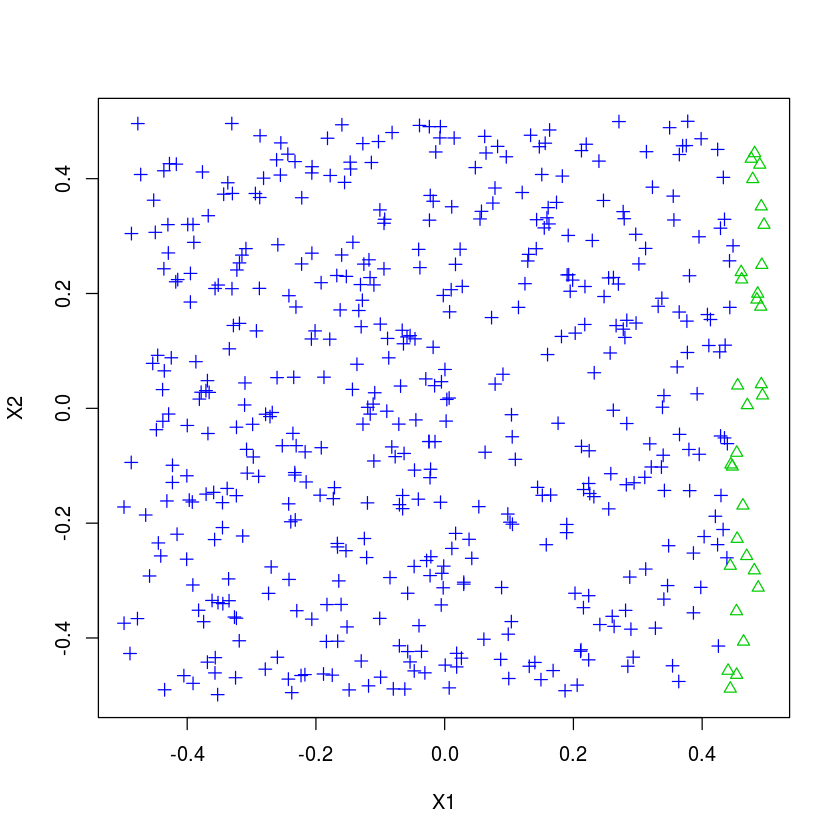

In [4]:
# predict class label
probs <- predict(logit.fit, data, type = "response")
preds <- rep(0, 500)
preds[probs > 0.5] <- 1
table(preds)
# plot decision boundary 

plot(data$x1, data$x2, col = (4 - preds), pch = (3 - preds), xlab = "X1", ylab = "X2")

#### The decision boundary is obviously linear.

### (e) Logistic regression with non-linear functions

Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2, X_1 \times X_2, \log(X_2$), and so forth). 

In [5]:
logitnl.fit <- glm(y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [6]:
summary(logitnl.fit)


Call:
glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-8.240e-04  -2.000e-08  -2.000e-08   2.000e-08   1.163e-03  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    -102.2     4302.0  -0.024    0.981
poly(x1, 2)1   2715.3   141109.5   0.019    0.985
poly(x1, 2)2  27218.5   842987.2   0.032    0.974
poly(x2, 2)1   -279.7    97160.4  -0.003    0.998
poly(x2, 2)2 -28693.0   875451.3  -0.033    0.974
I(x1 * x2)     -206.4    41802.8  -0.005    0.996

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9218e+02  on 499  degrees of freedom
Residual deviance: 3.5810e-06  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


#### Here again, none of the variables are statistically significants.

### (f)   Plot the decision boundary¶

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision b
oundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear. 

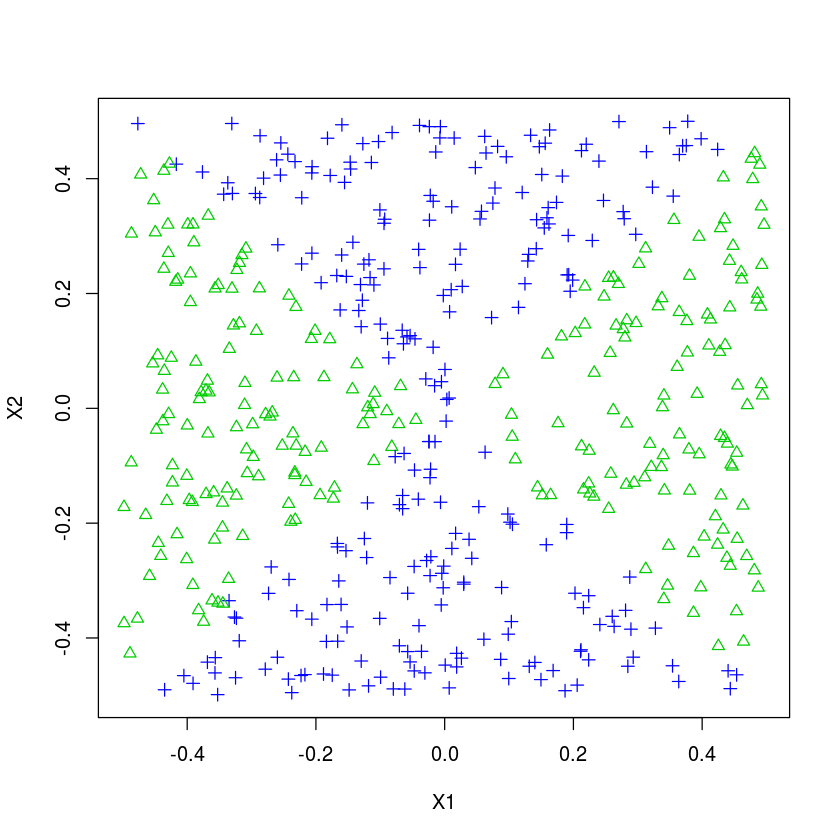

In [7]:
probs <- predict(logitnl.fit, data, type = "response")
preds <- rep(0, 500)
preds[probs > 0.47] <- 1
plot(data$x1, data$x2, col = (4 - preds), pch = (3 - preds), xlab = "X1", ylab = "X2")

####  The non-linear decision boundary is surprisingly very similar to the true decision boundary.

### (g) Support vector classifier

Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels. 

In [8]:
# load the library
library(e1071)

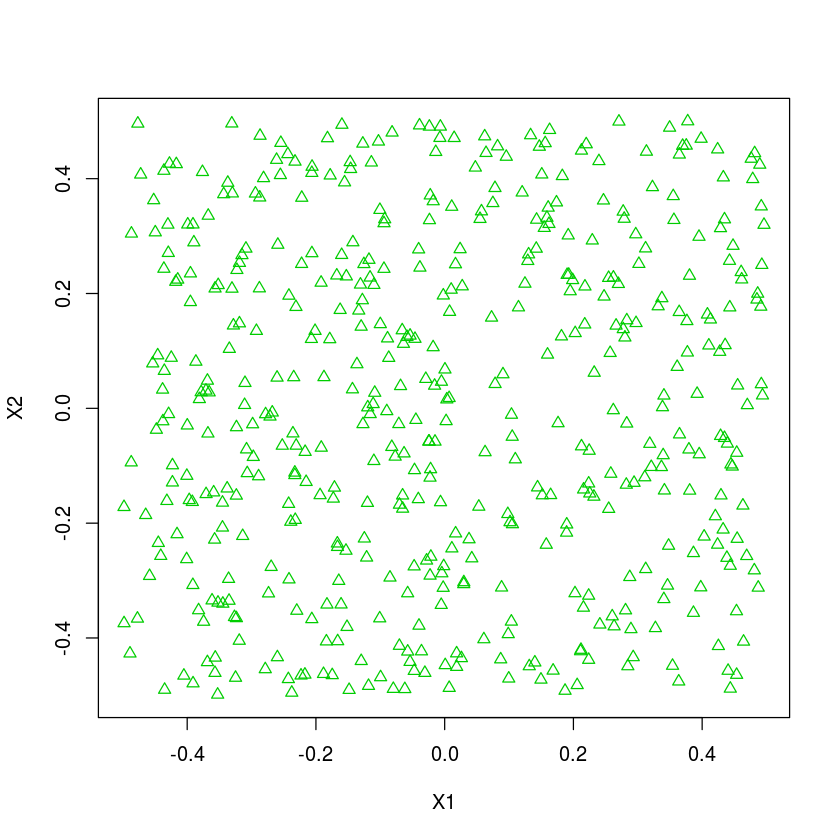

In [9]:
data$y <- as.factor(data$y)
svm.fit <- svm(y ~ x1 + x2, data, kernel = "linear", cost = 0.1)
preds <- as.numeric(predict(svm.fit, data))
plot(data$x1, data$x2, col = (4 - preds), pch = (3 - preds), xlab = "X1", ylab = "X2")

####  This support vector classifier (even with low cost) classifies all points to a single class.

### (h) SVM using a non-linear kernel 

Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels. 

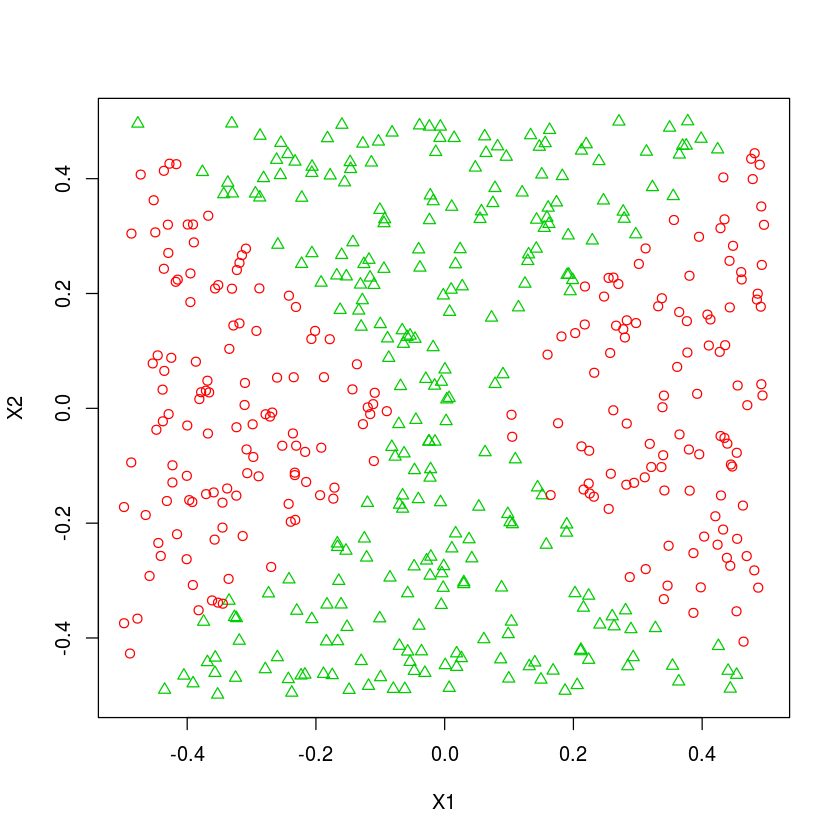

In [10]:
data$y <- as.factor(data$y)
svmnl.fit <- svm(y ~ x1 + x2, data, kernel = "radial", gamma = 1)
preds <- as.numeric(predict(svmnl.fit, data))
plot(data$x1, data$x2, col = (4 - preds), pch = (3 - preds), xlab = "X1", ylab = "X2")

#### Here again, the non-linear decision boundary is surprisingly very similar to the true decision boundary.

### (i) Comment on your results. 

Answer: We may conclude that SVM with non-linear kernel and logistic regression with interaction terms are equally very powerful for finding non-linear decision boundaries. Also, SVM with linear kernel and logistic regression without any interaction term are very bad when it comes to finding non-linear decision boundaries. However, one argument in favor of SVM is that it requires some manual tuning to find the right interaction terms when using logistic regression, although when using SVM we only need to tune gamma.

## TASK 2

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

### (a) Create data 

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median. 

In [11]:
library(ISLR)
Auto=Auto[,-9]
head(Auto)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1

In [12]:
Auto$mpglevel <- as.factor(ifelse(Auto$mpg > median(Auto$mpg), 1, 0))
head(Auto)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1     
  mpglevel
1 0       
2 0       
3 0       
4 0       
5 0       
6 0

### (b) Support vector classifier and performe 10-fold CV to find the best cost

Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. 

In [13]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.0025 

- Detailed performance results:
   cost      error  dispersion
1 1e-02 0.07403846 0.054715251
2 1e-01 0.04326923 0.049750317
3 1e+00 0.01532051 0.017888712
4 5e+00 0.01525641 0.017848724
5 1e+01 0.01019231 0.013159514
6 1e+02 0.00250000 0.007905694
7 1e+03 0.00250000 0.007905694


#### A cost of 1 seems to perform best.

### (c) SVM with  radial and polynomial basis kernels

Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results. 

In [14]:
# polynomial kernel
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      3

- best performance: 0.03576923 

- Detailed performance results:
    cost degree      error dispersion
1  1e-02      2 0.47948718 0.09170874
2  1e-01      2 0.28596154 0.08886241
3  1e+00      2 0.21423077 0.10890680
4  5e+00      2 0.18858974 0.06738179
5  1e+01      2 0.19365385 0.06399881
6  1e+02      2 0.18358974 0.08838006
7  1e-02      3 0.26301282 0.09351168
8  1e-01      3 0.15583333 0.06698263
9  1e+00      3 0.06391026 0.04882098
10 5e+00      3 0.04602564 0.04150561
11 1e+01      3 0.03576923 0.02169156
12 1e+02      3 0.03576923 0.02483197
13 1e-02      4 0.38044872 0.06720909
14 1e-01      4 0.27589744 0.09453007
15 1e+00      4 0.22442308 0.08495703
16 5e+00      4 0.18378205 0.09240560
17 1e+01      4 0.18108974 0.09183424
18 1e+02      4 0.12737179 0.05825152


In [15]:
tune.out$best.parameters

cost degree
12 100  3

#### For a polynomial kernel, the lowest cross-validation error is obtained for a degree of 2 and a cost of 100.

In [16]:
# radial kernel
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    5   0.1

- best performance: 0.01782051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.56115385 0.04344202
2  1e-01 1e-02 0.09185897 0.03862507
3  1e+00 1e-02 0.07403846 0.05055146
4  5e+00 1e-02 0.04326923 0.04975032
5  1e+01 1e-02 0.03314103 0.04510526
6  1e+02 1e-02 0.01788462 0.02430352
7  1e-02 1e-01 0.10480769 0.03942901
8  1e-01 1e-01 0.07660256 0.05546117
9  1e+00 1e-01 0.05096154 0.04511053
10 5e+00 1e-01 0.01782051 0.02088734
11 1e+01 1e-01 0.02294872 0.01453243
12 1e+02 1e-01 0.02288462 0.01870128
13 1e-02 1e+00 0.56115385 0.04344202
14 1e-01 1e+00 0.09435897 0.05261602
15 1e+00 1e+00 0.05608974 0.04797496
16 5e+00 1e+00 0.04833333 0.04726349
17 1e+01 1e+00 0.04826923 0.05007669
18 1e+02 1e+00 0.04826923 0.05007669
19 1e-02 5e+00 0.56115385 0.04344202
20 1e-01 5e+00 0.56115385 0.04344202
21 1e+00 5e+00 0.08679487 0.05823910
22

In [17]:
tune.out$best.parameters

cost gamma
10 5    0.1

#### For a radial kernel, the lowest cross-validation error is obtained for a gamma of 0.01 and a cost of 100.

### (d)  Plot results

Make some plots to back up your assertions in (b) and (c). 
Hint: In the lab, we used the plot() function for svm objects only in cases with p = 2. When p > 2, you can use the plot() function to create plots displaying pairs of variables at a time. Essentially, instead of typing 

plot(svmfit , dat) 

where svmfit contains your fitted model and dat is a data frame containing your data, you can type 

plot(svmfit , dat , x1∼x4) 

in order to plot just the first and fourth variables. However, you must replace x1 and x4 with the correct variable names. To find out more, type ?plot.svm. 

In [18]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", covst = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)


In [19]:
# Function for plot
plotpairs = function(fit) {
    m = length(names(Auto))-1
    for (i in 1:m){
        for (j in (i+1):m) {
        plot(fit, Auto, as.formula(paste(names(Auto)[i], names(Auto)[j], sep='~')))
            }
        }
    }    

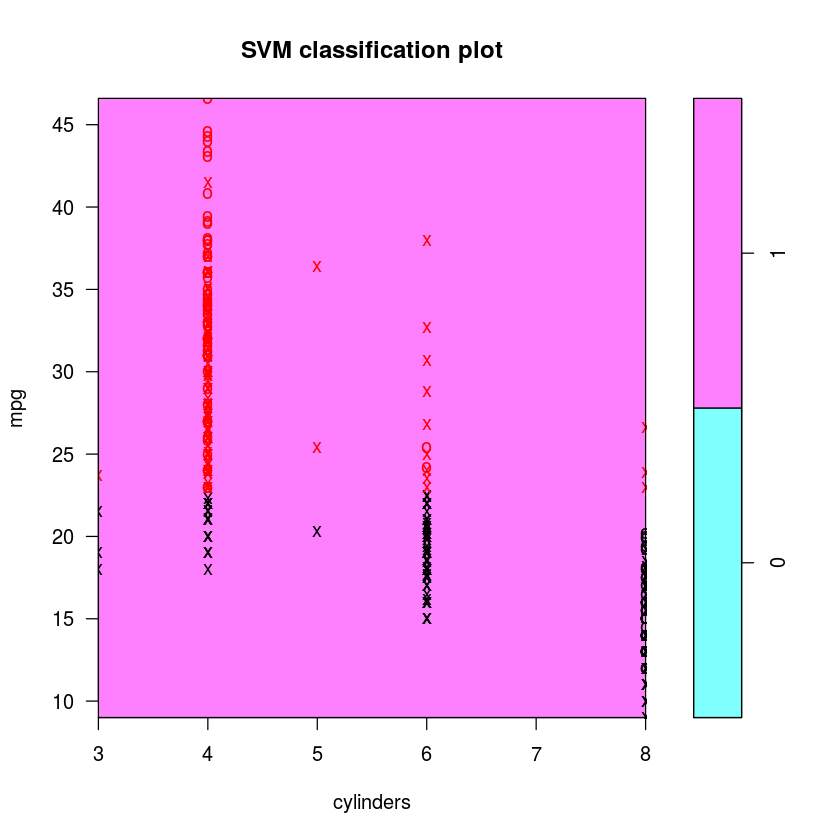

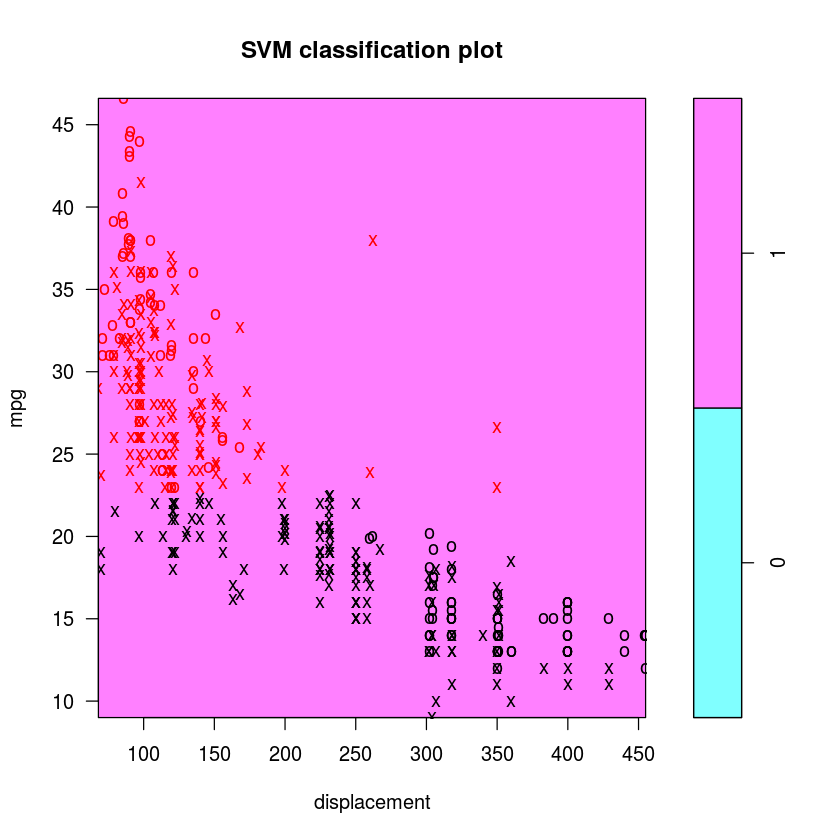

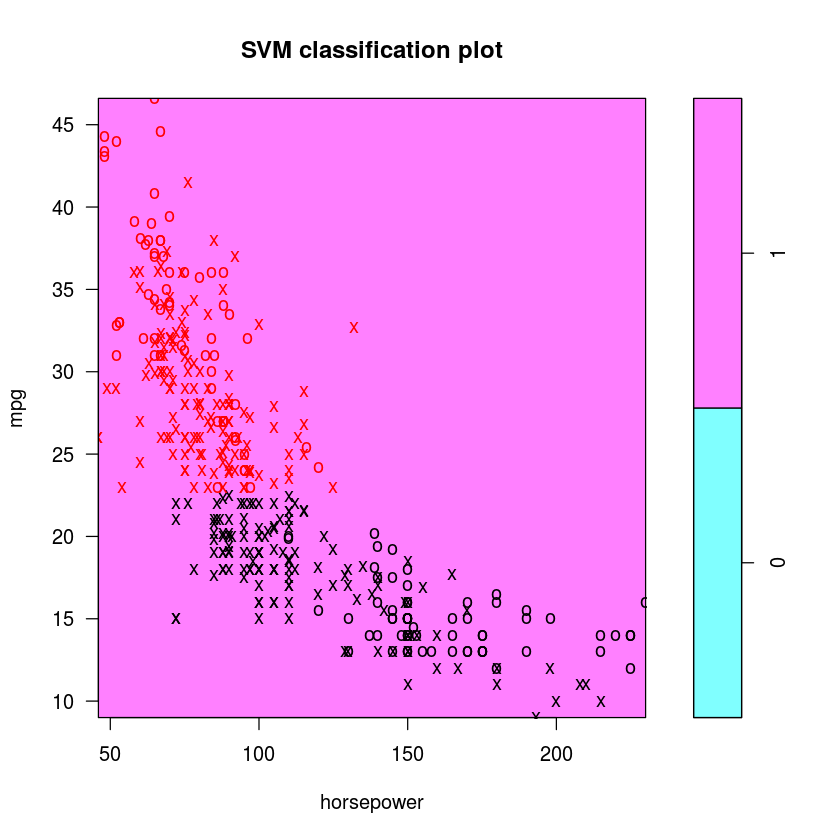

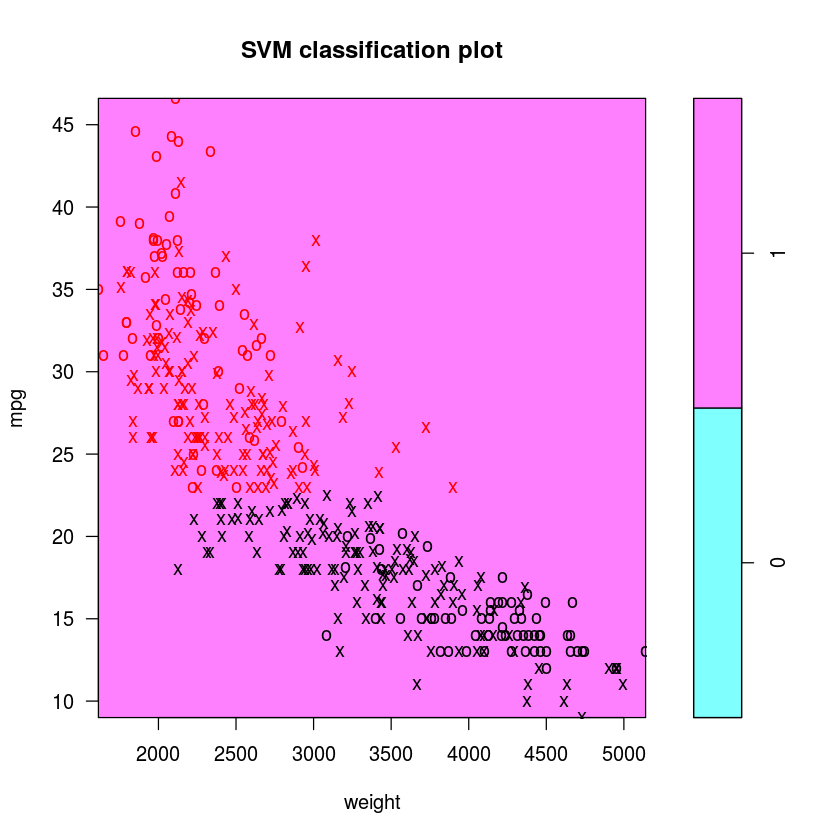

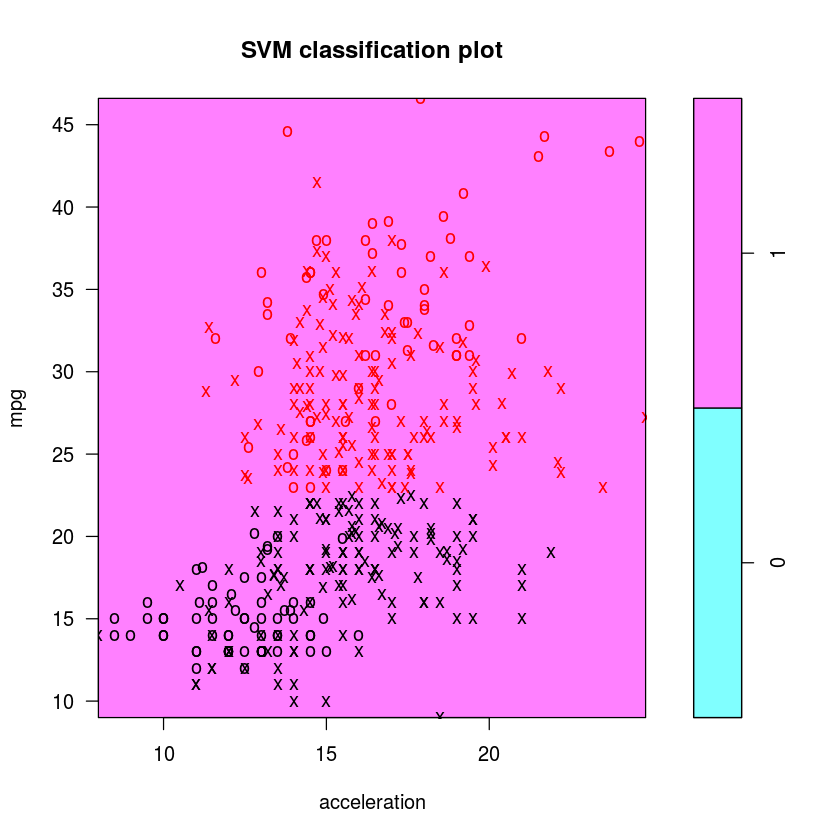

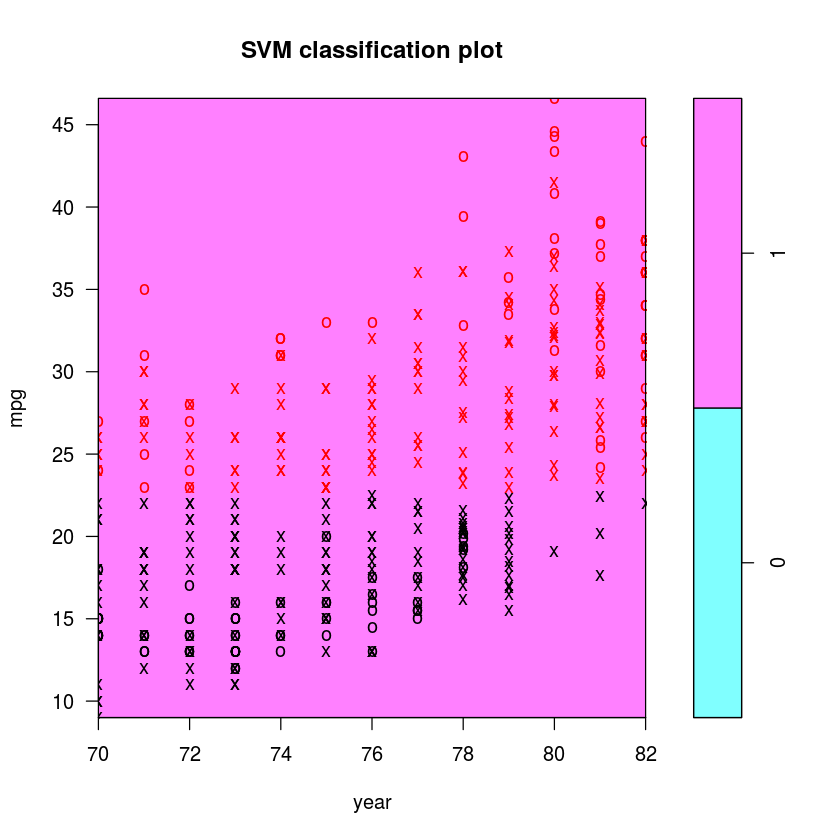

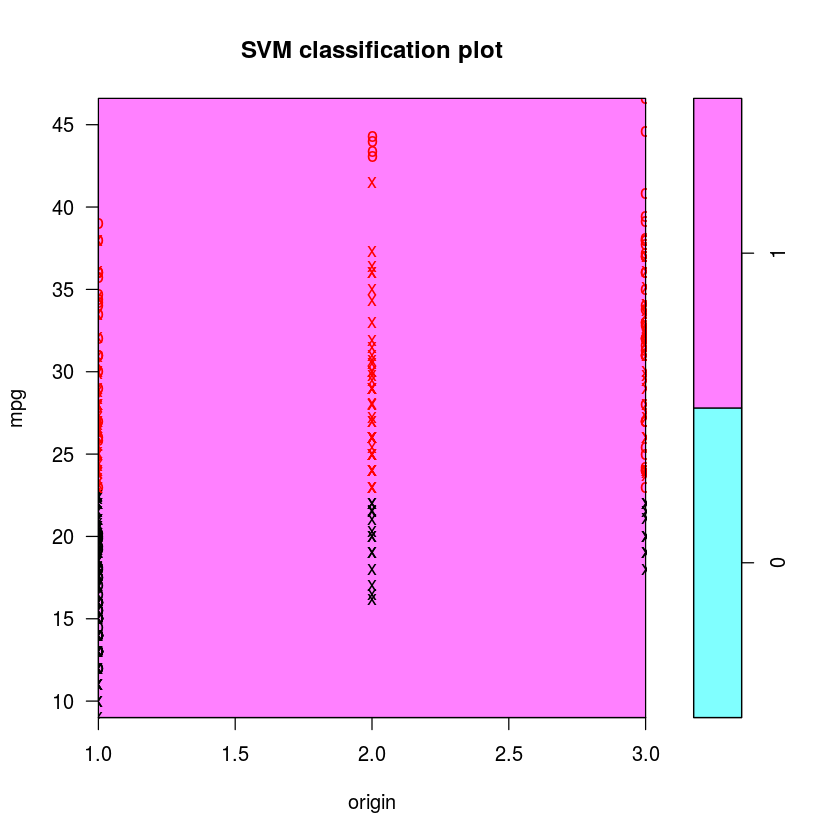

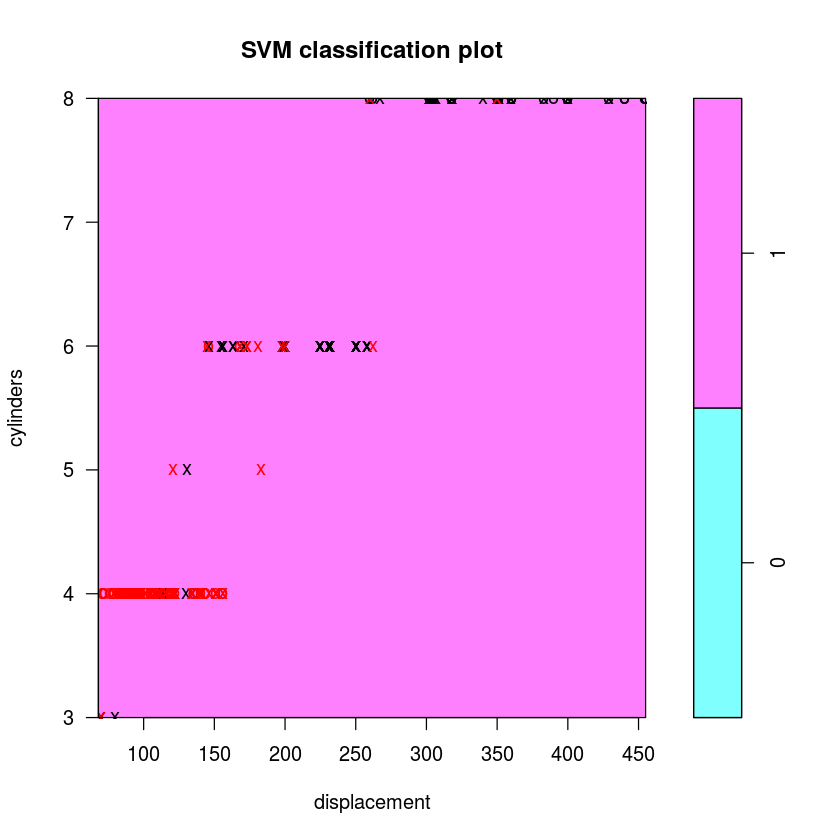

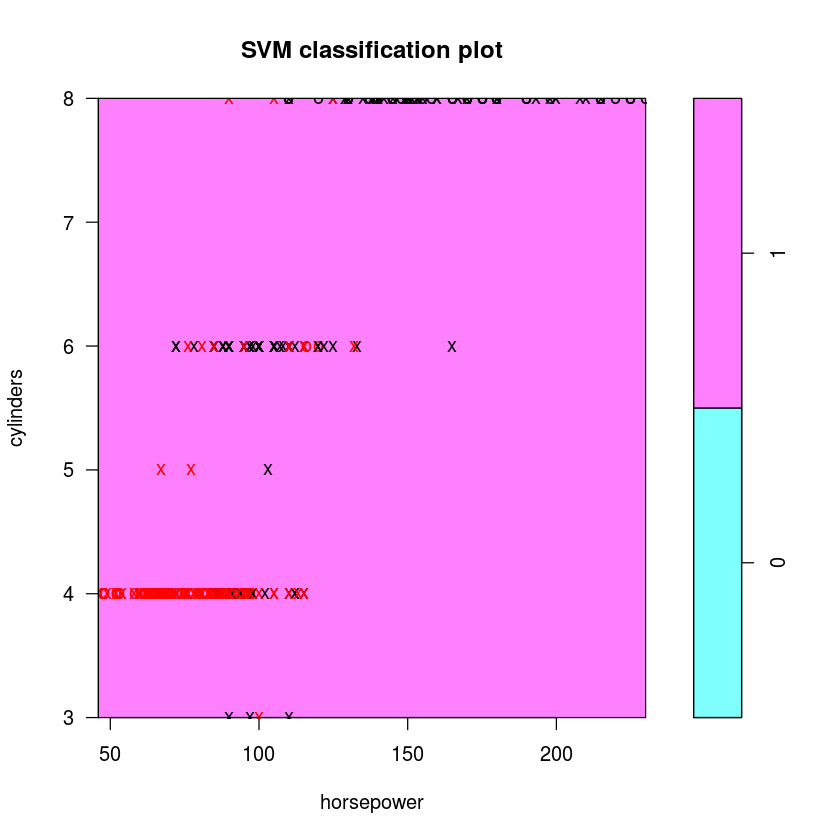

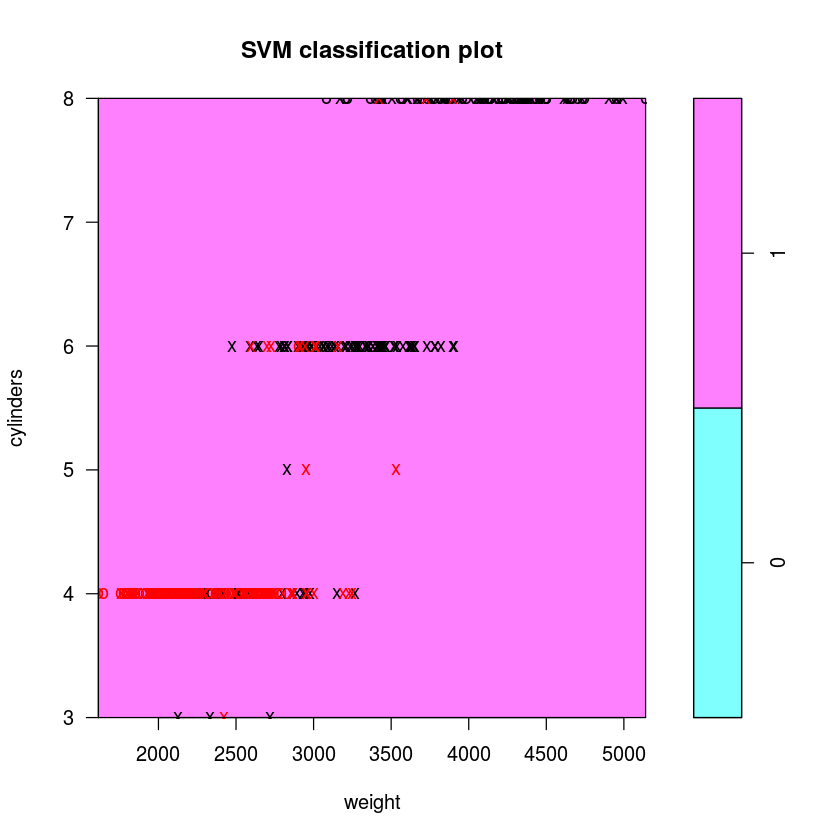

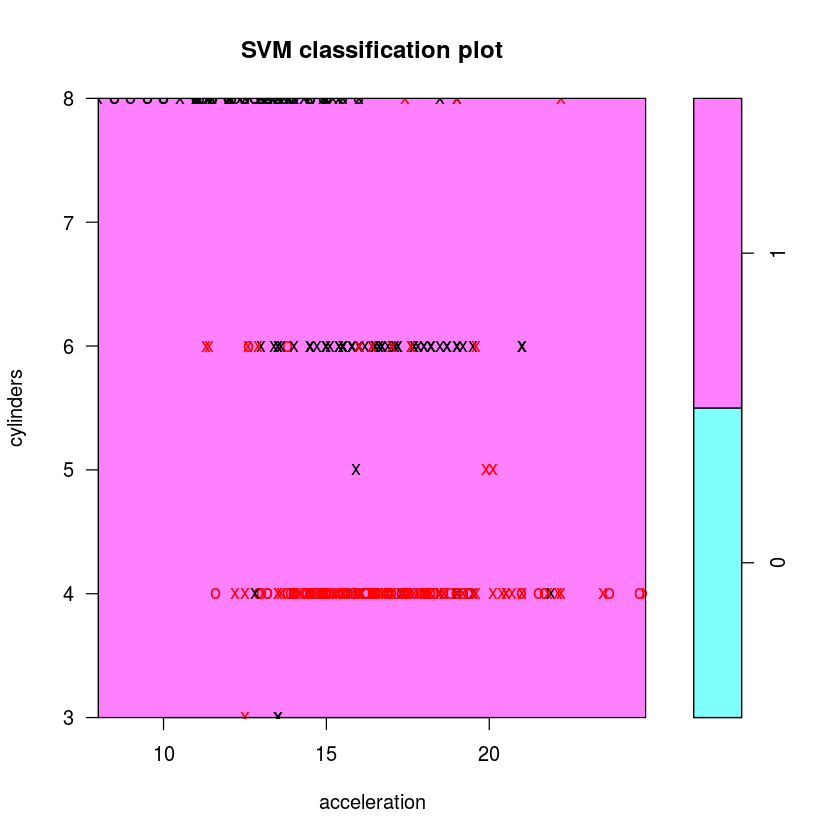

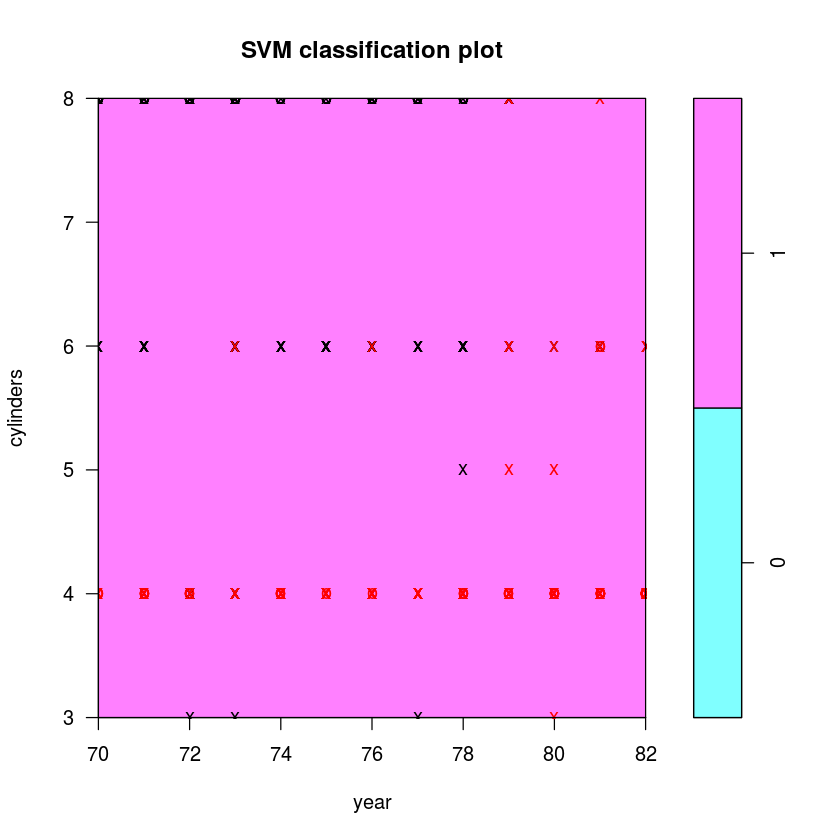

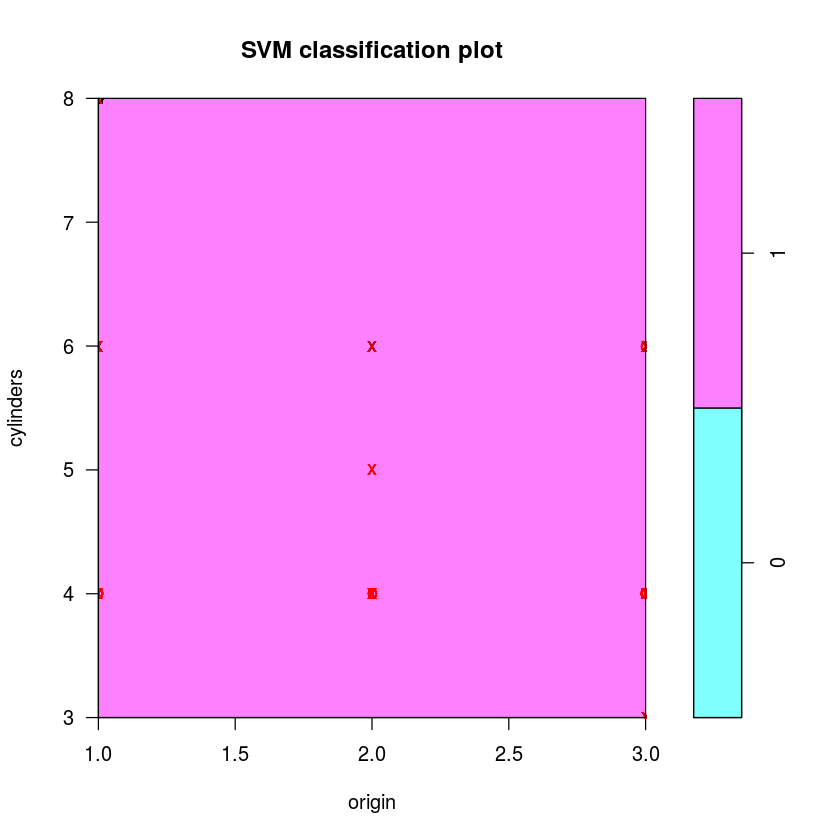

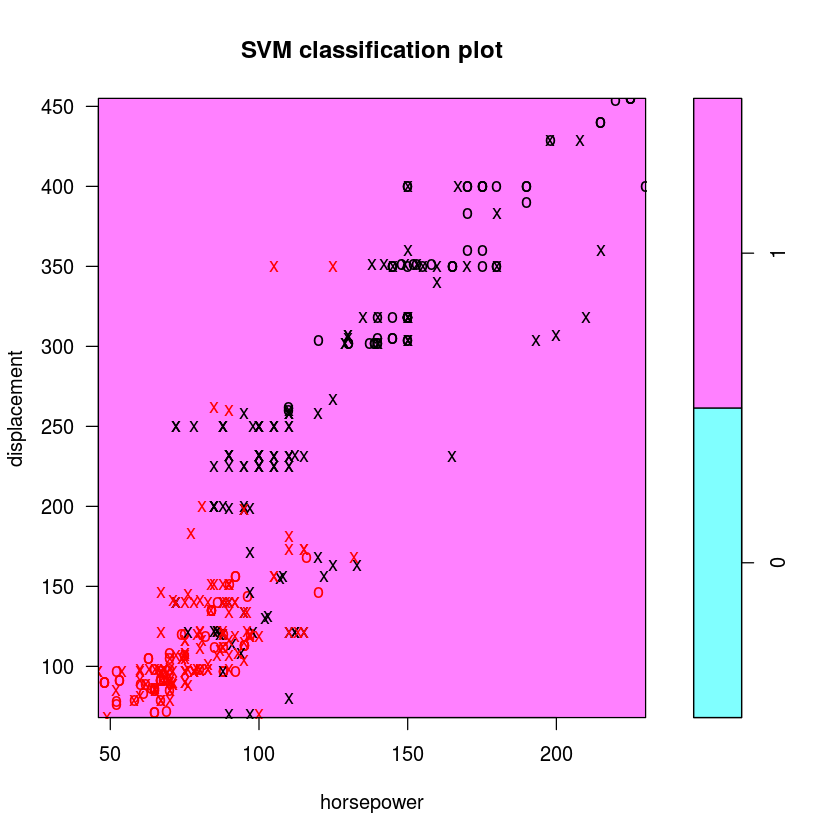

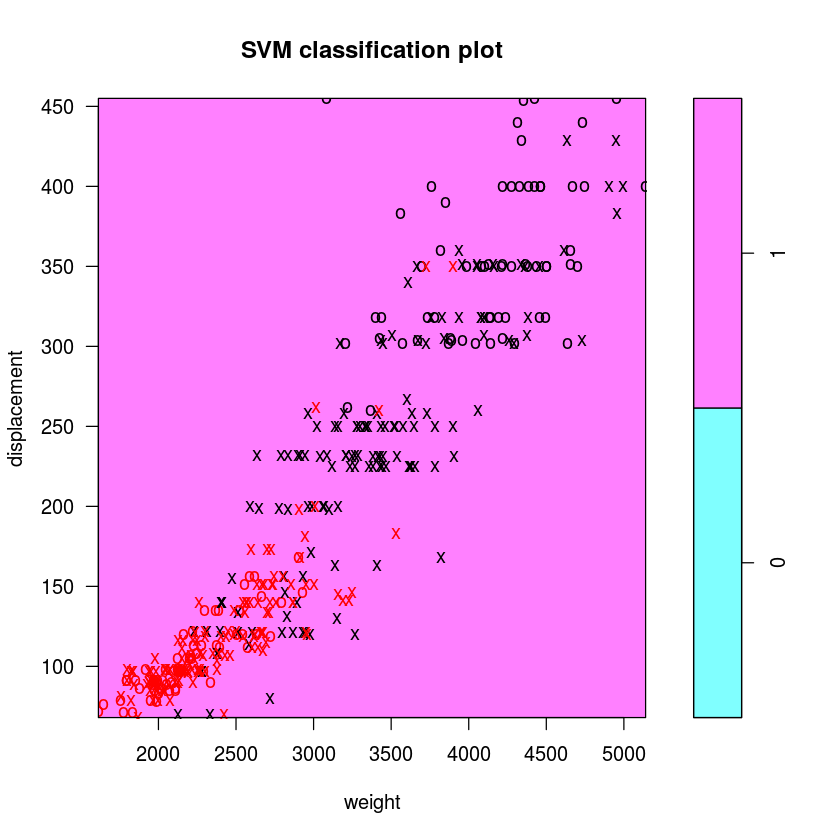

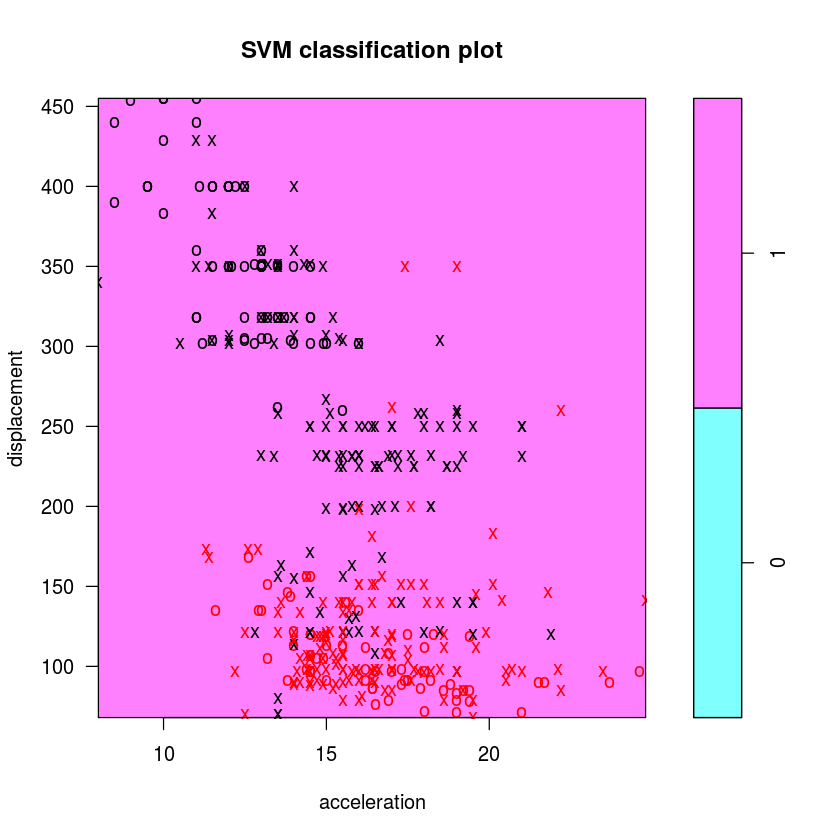

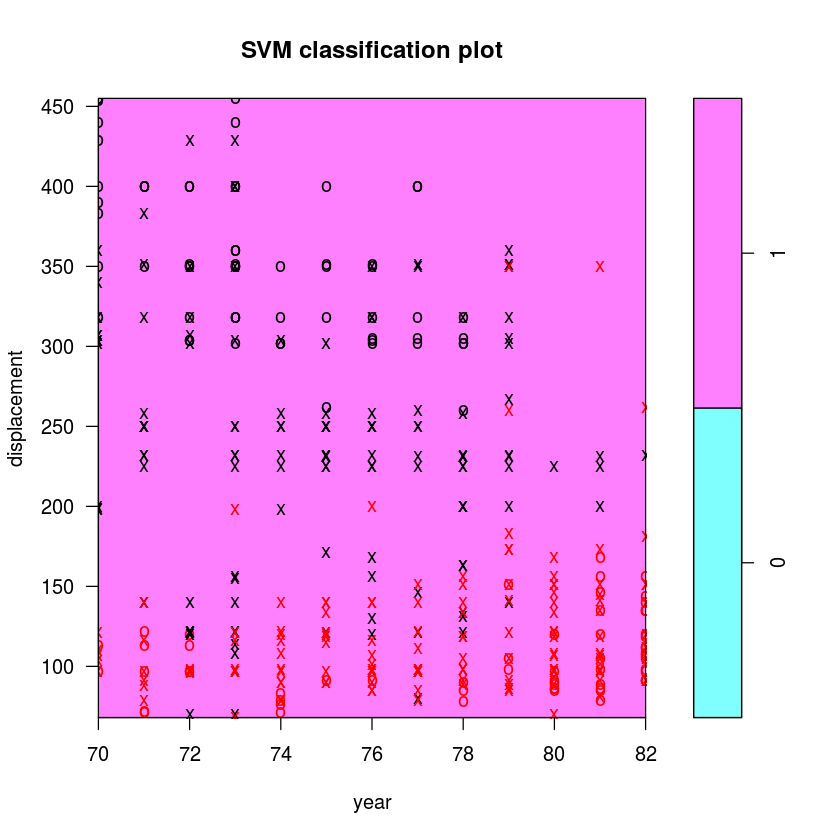

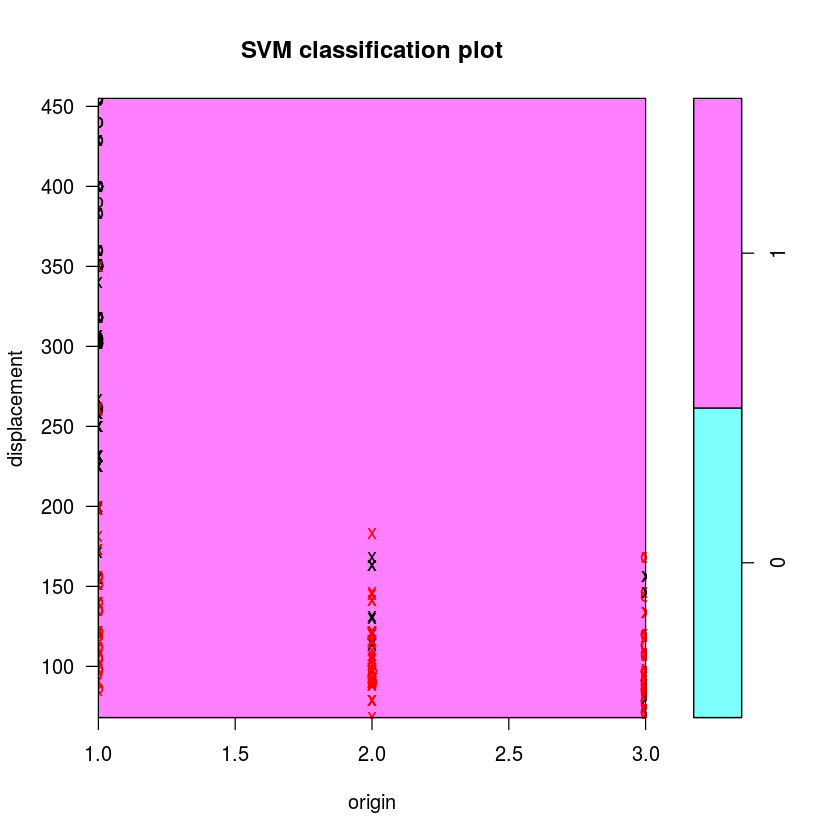

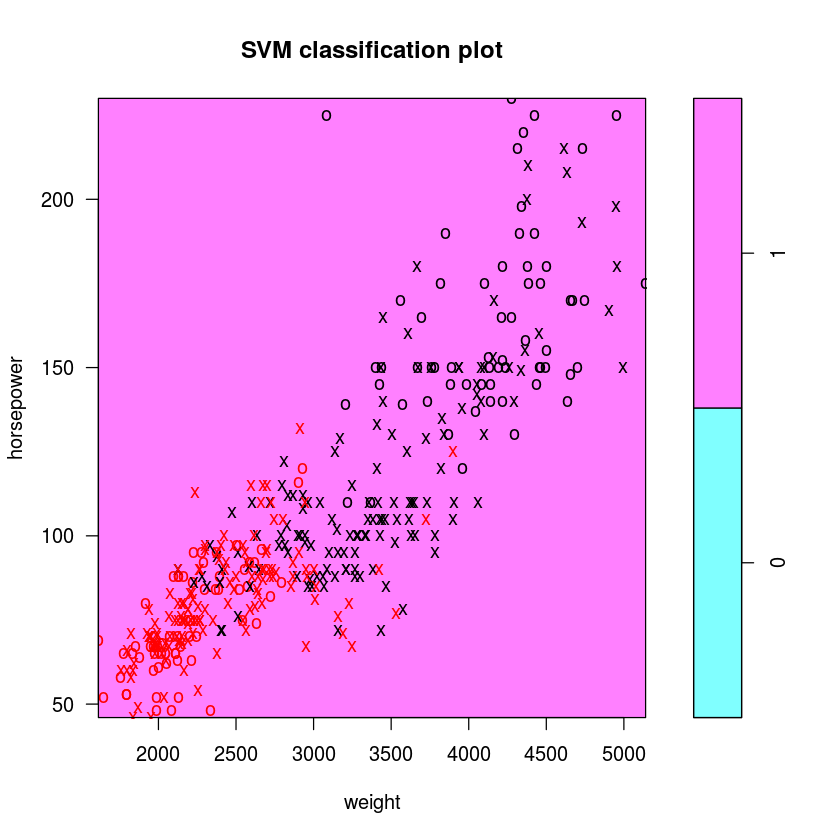

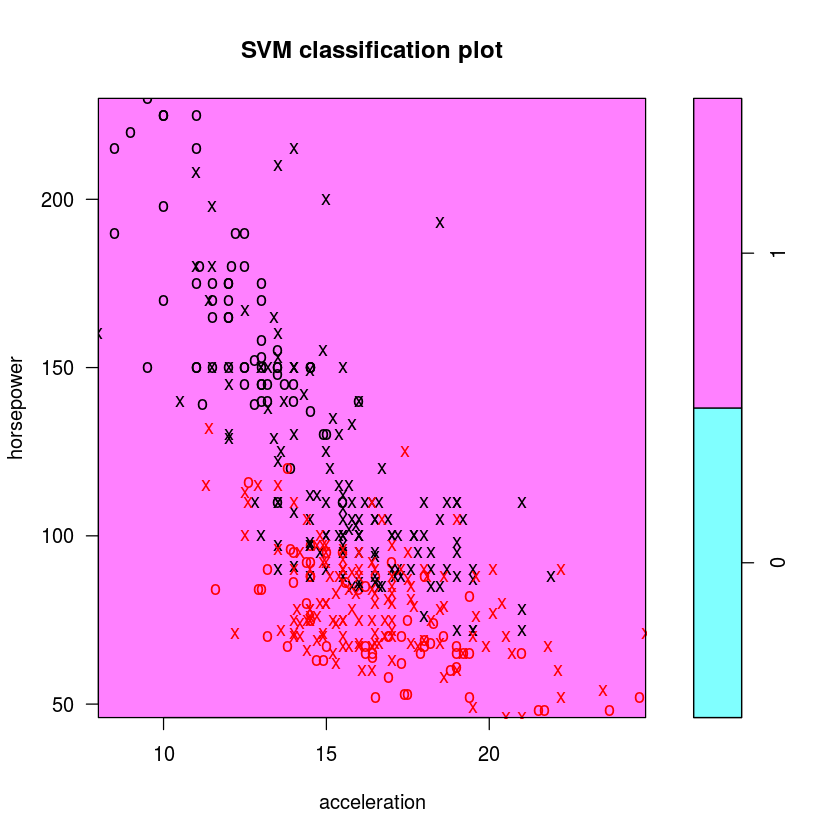

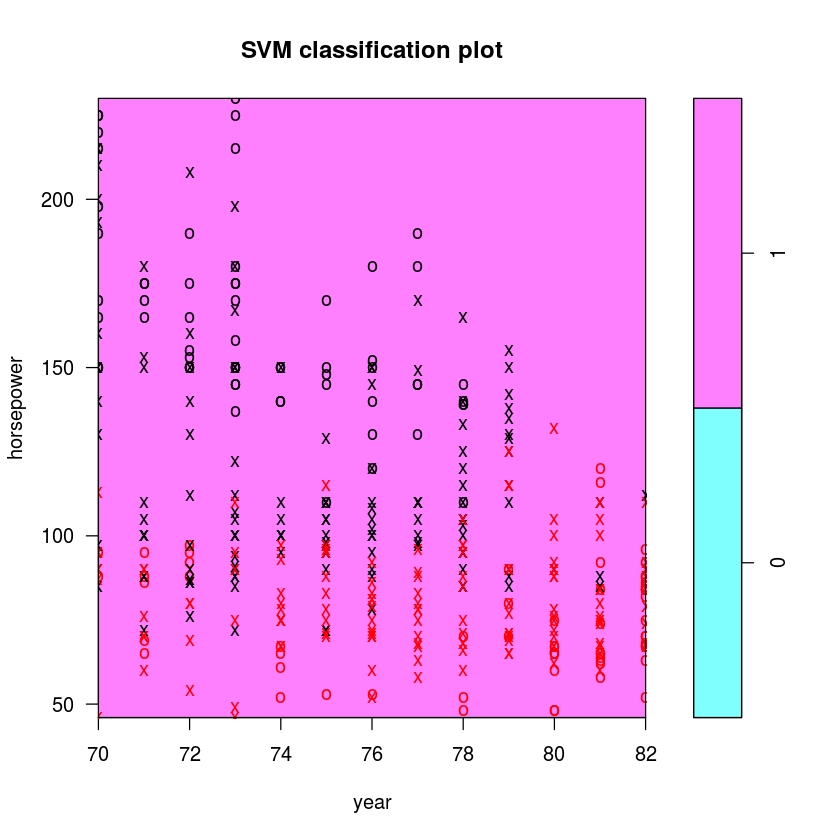

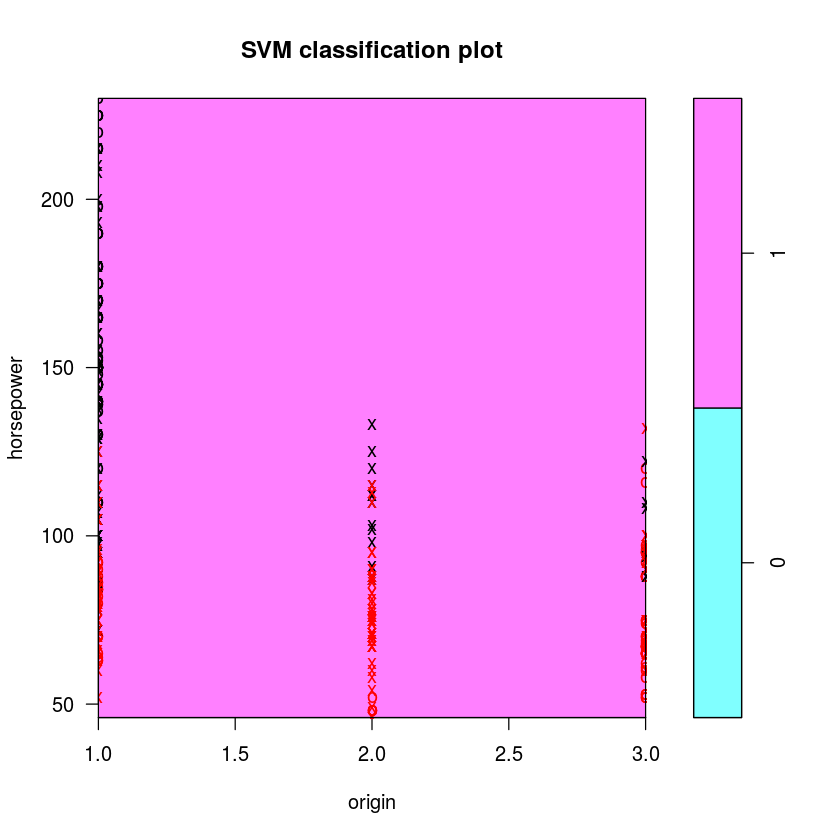

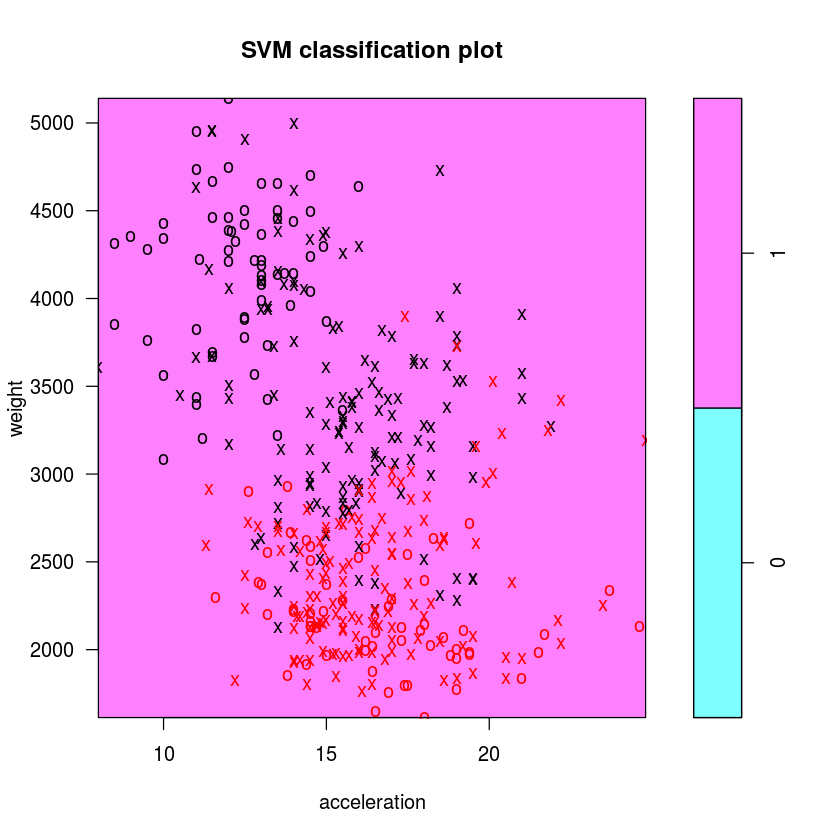

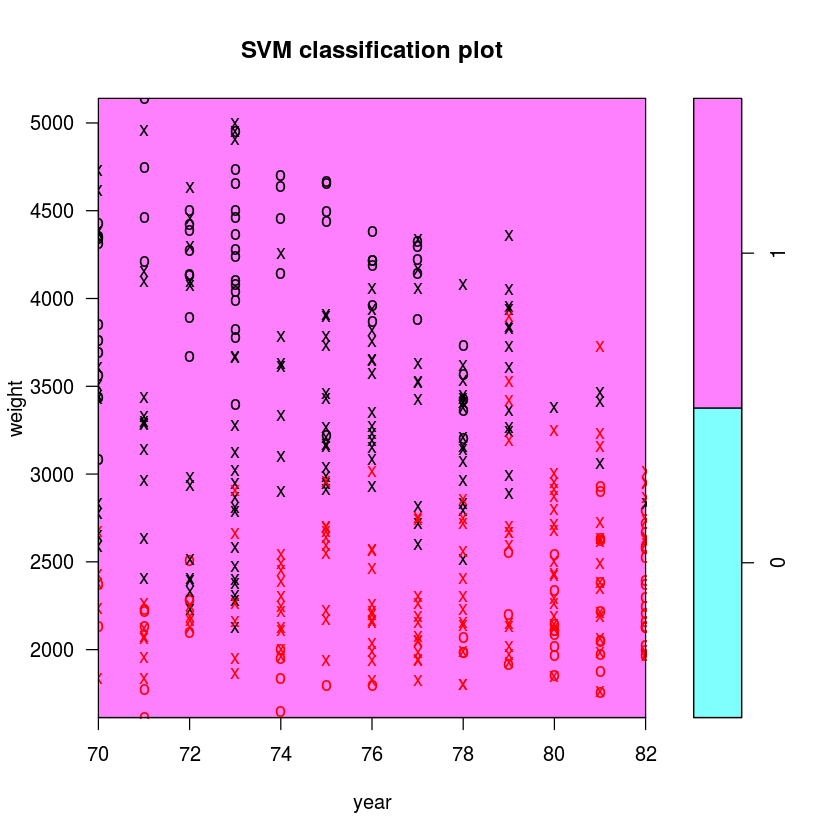

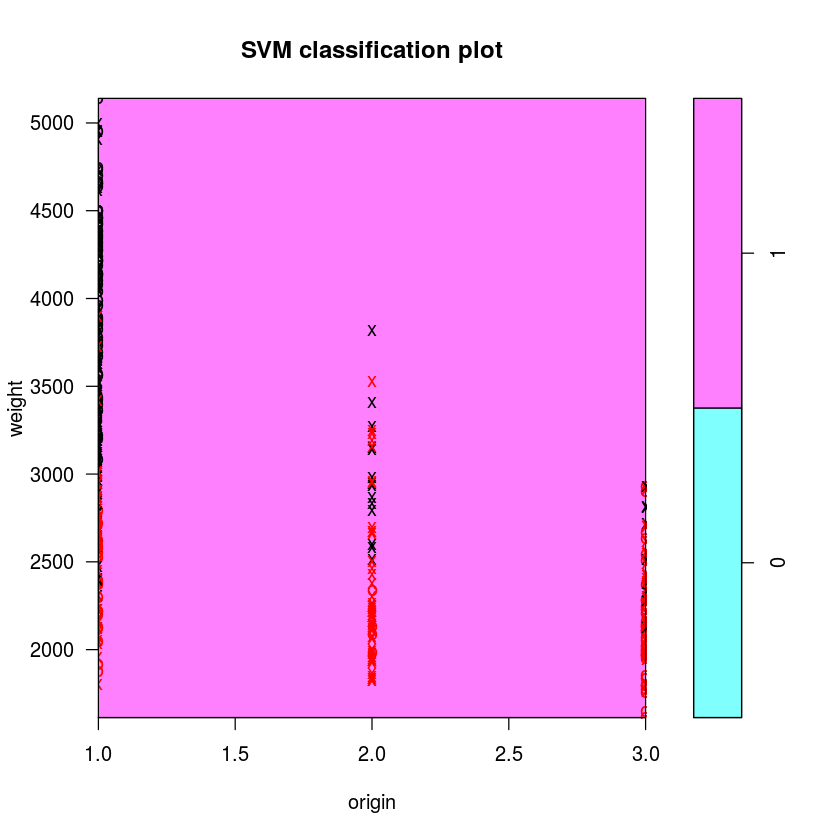

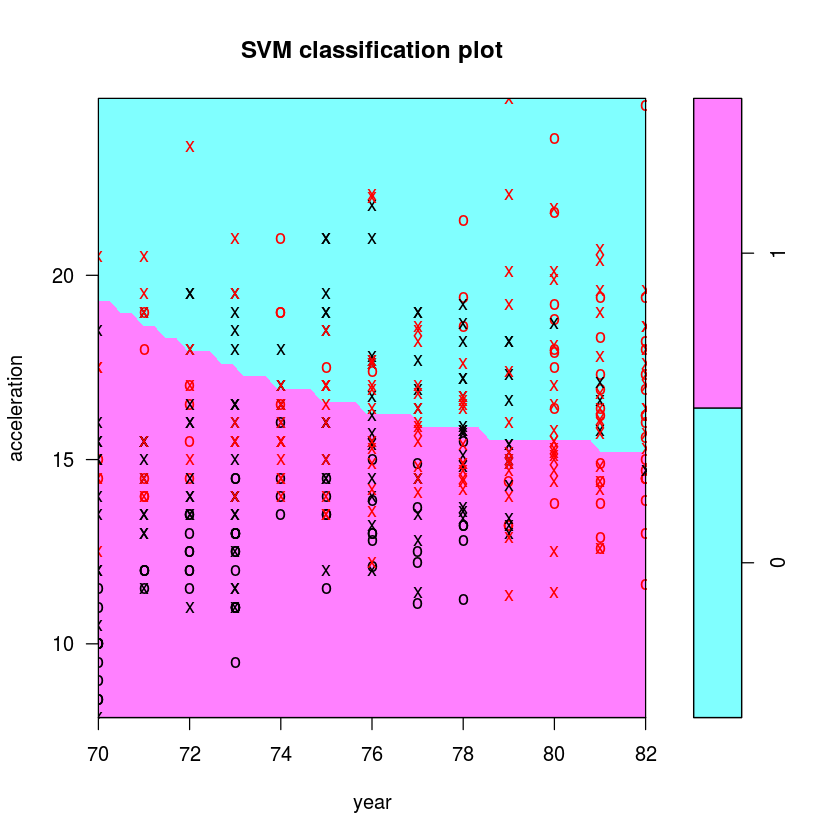

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, : ‘min’ not meaningful for factors


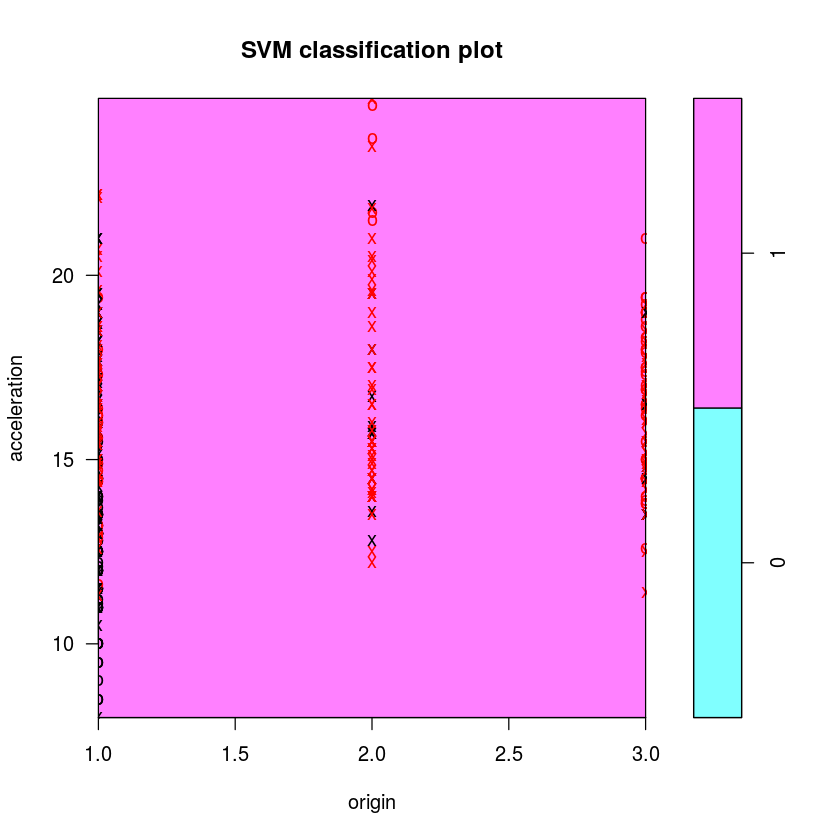

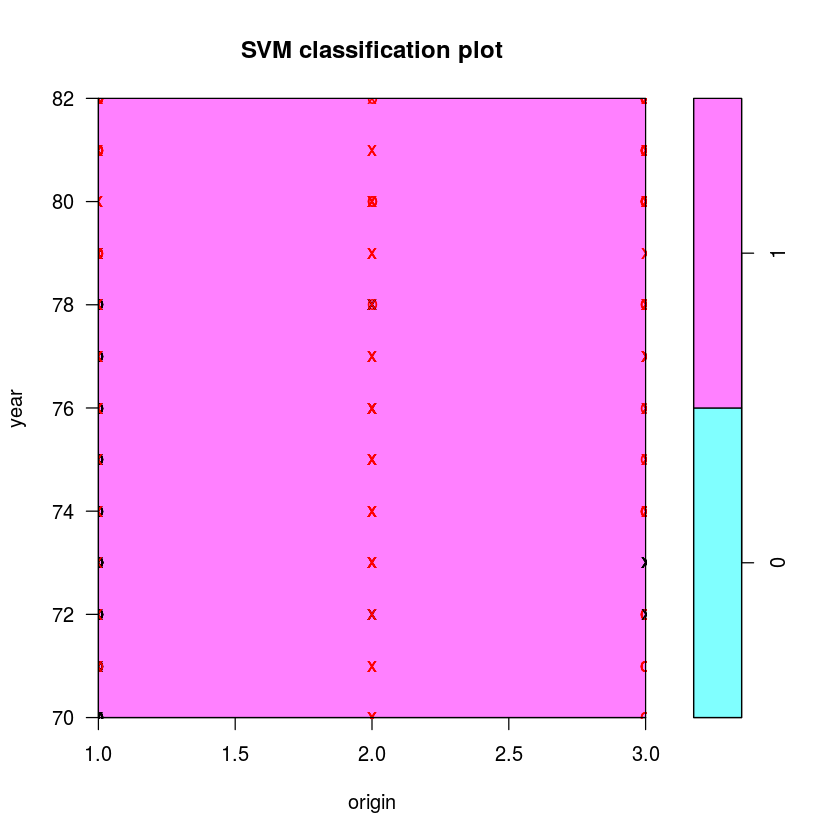

In [20]:
plotpairs(svm.poly)

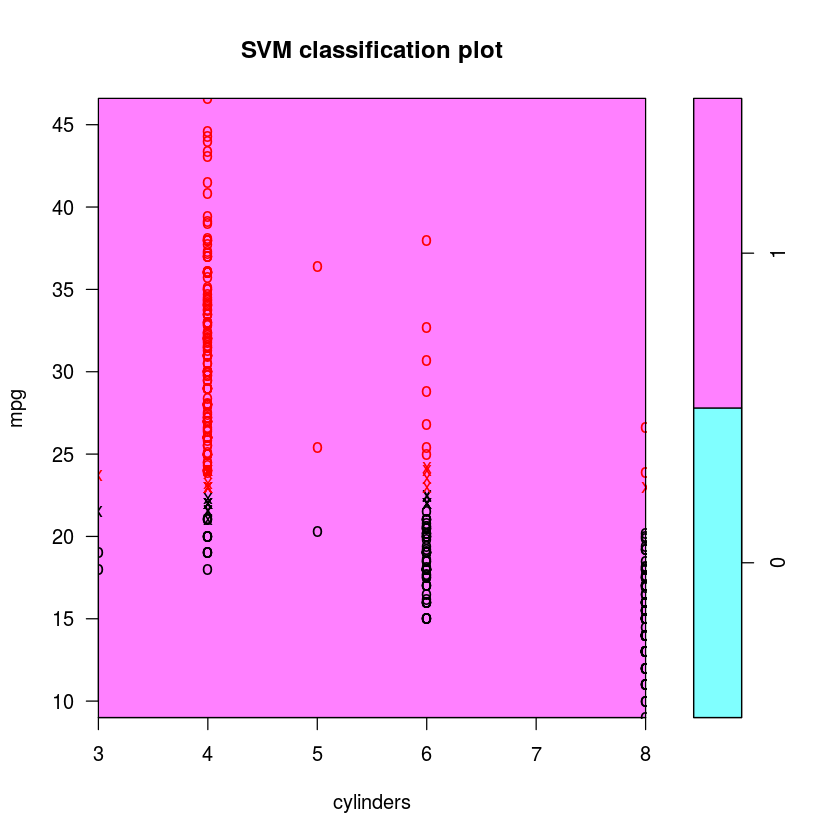

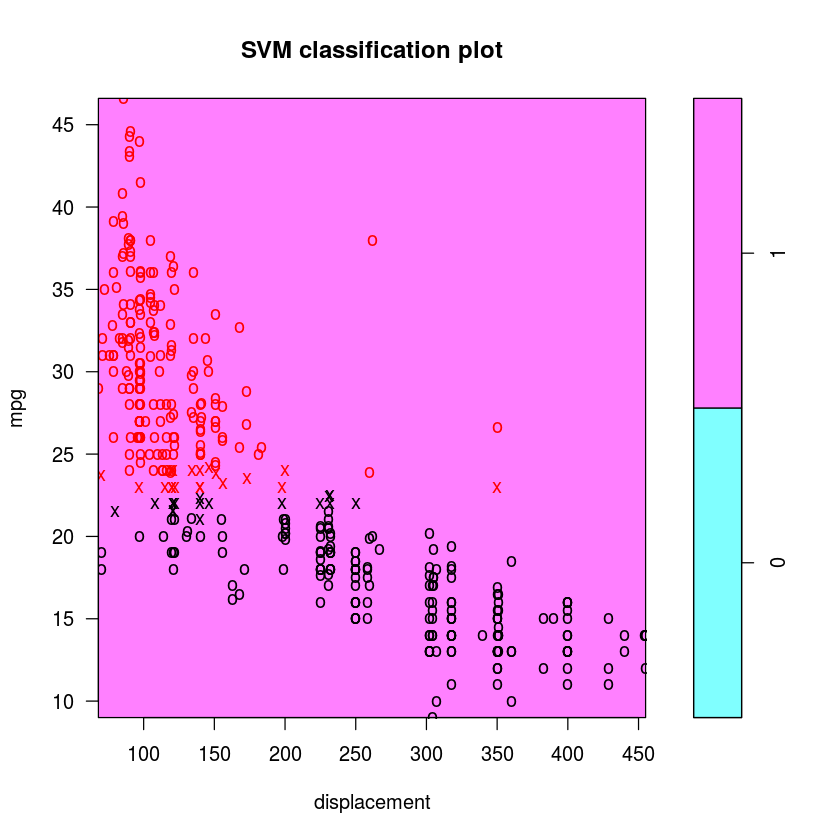

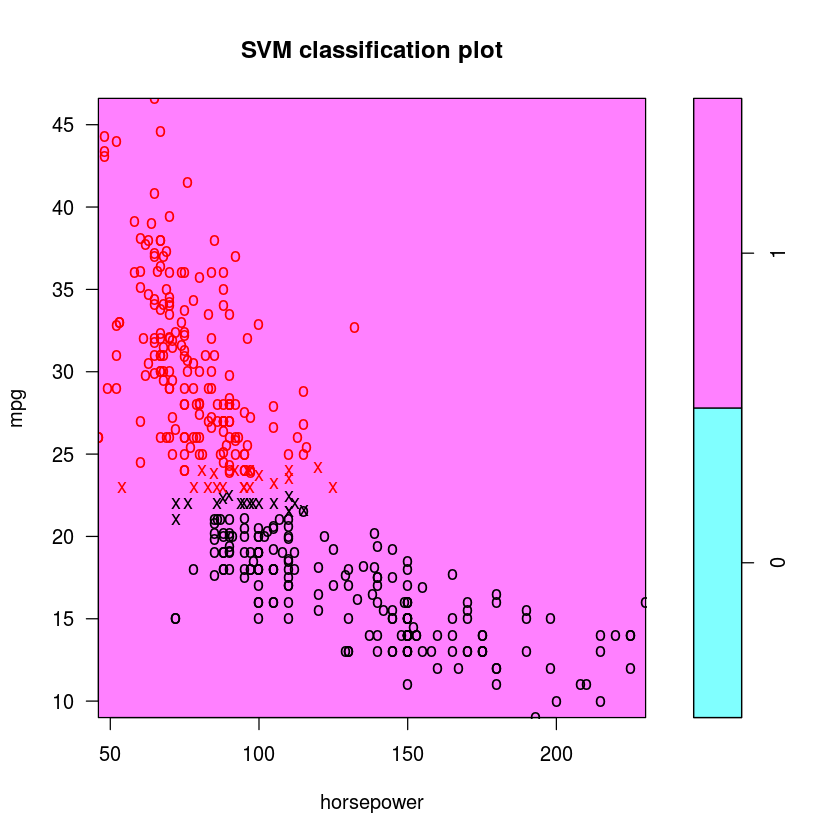

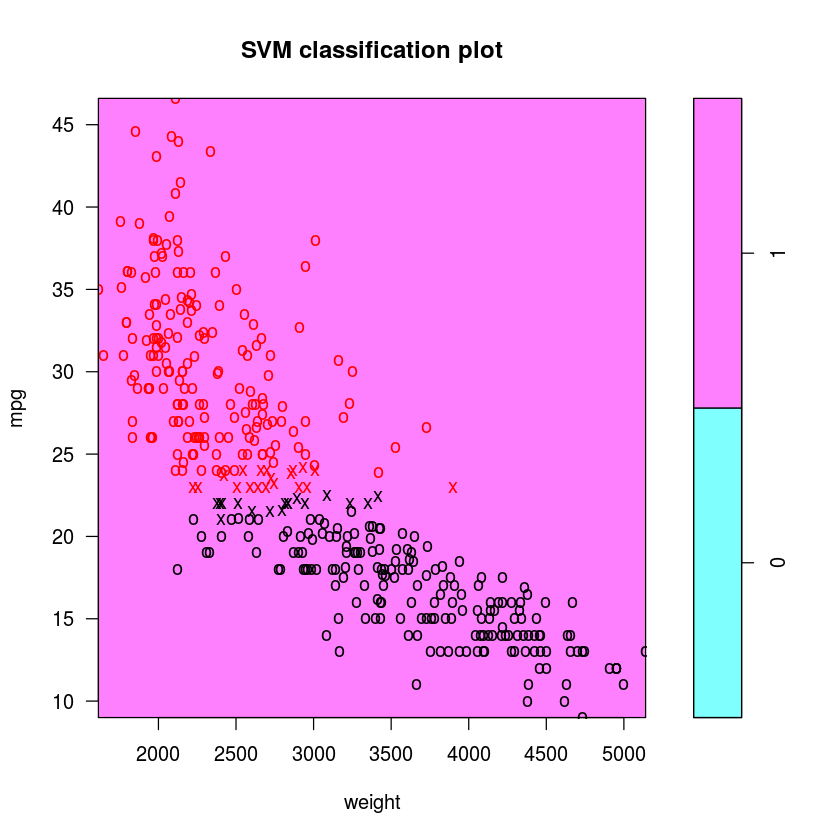

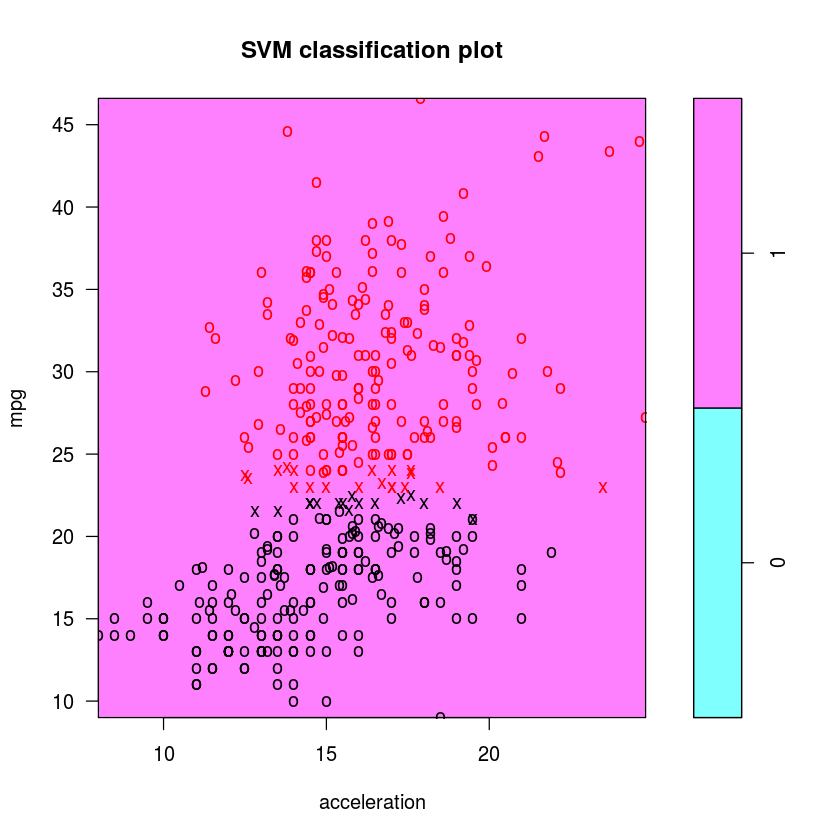

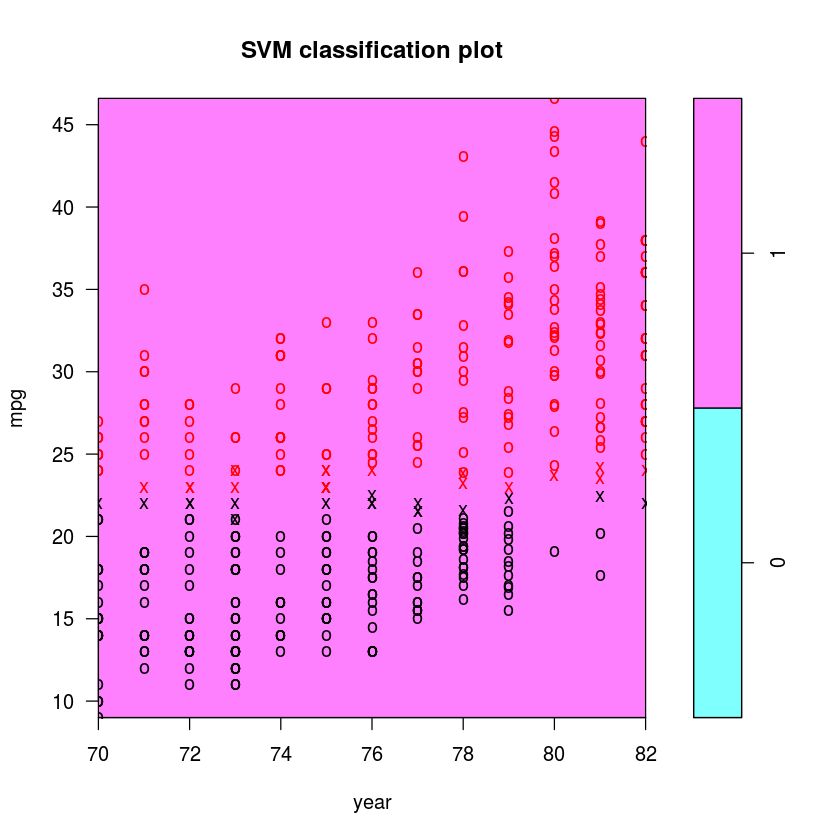

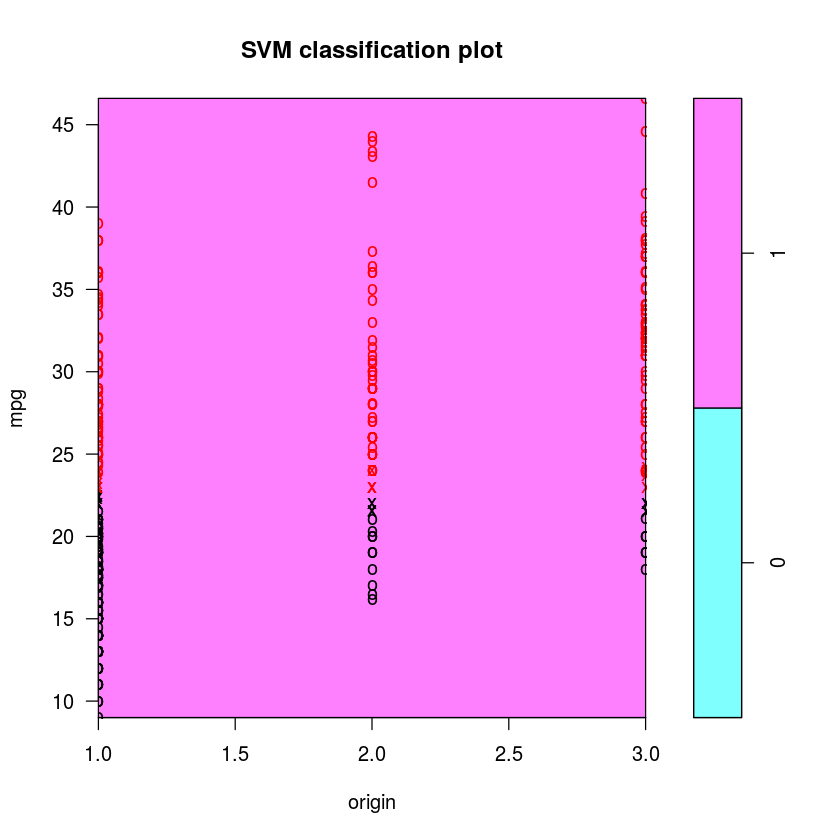

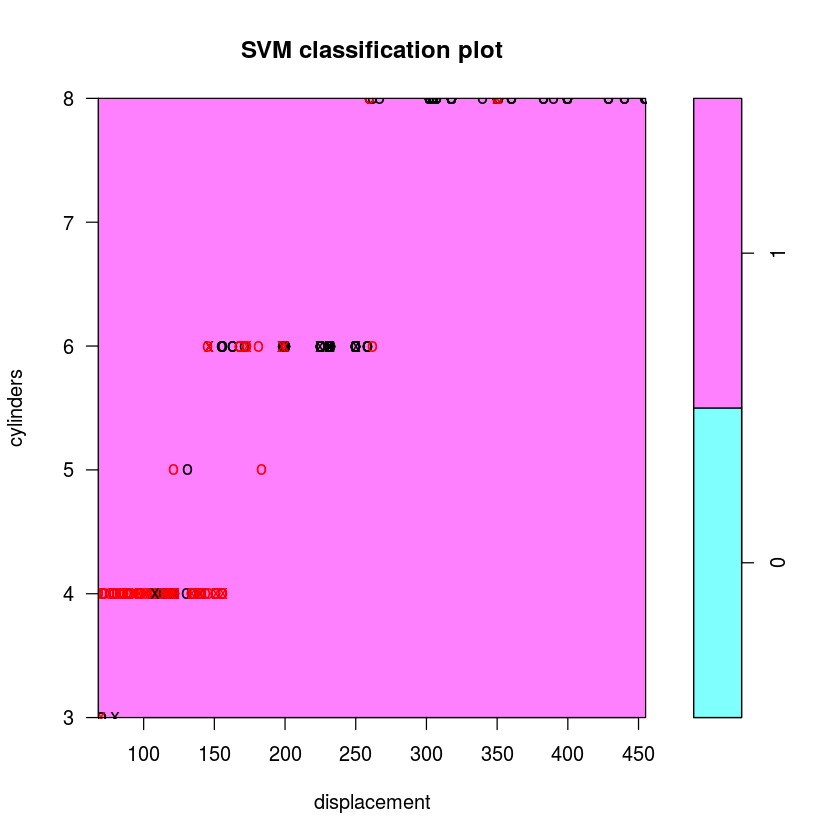

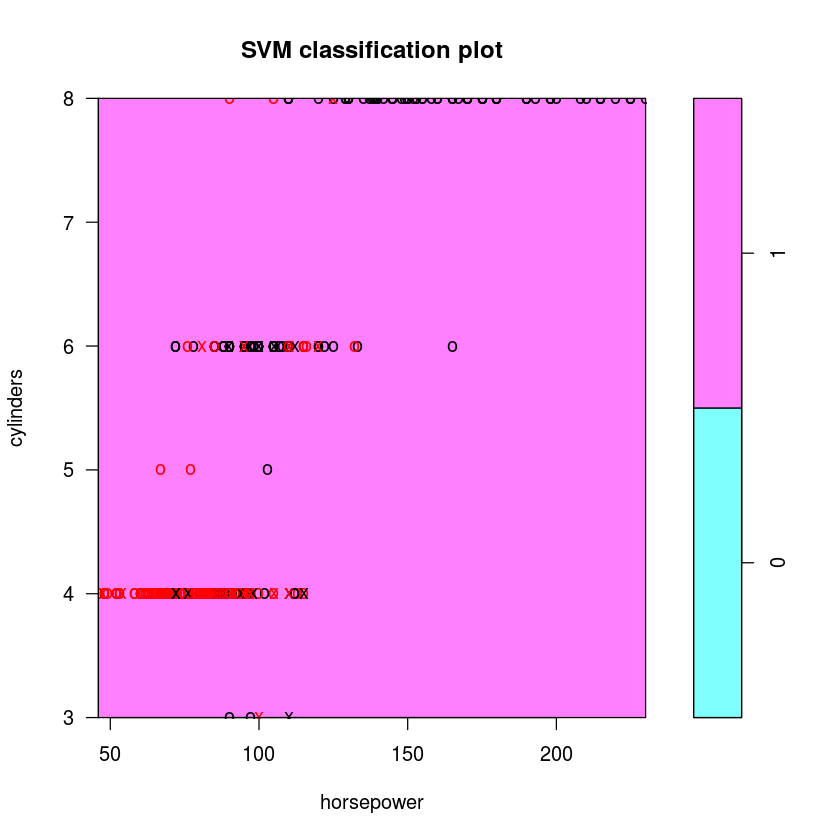

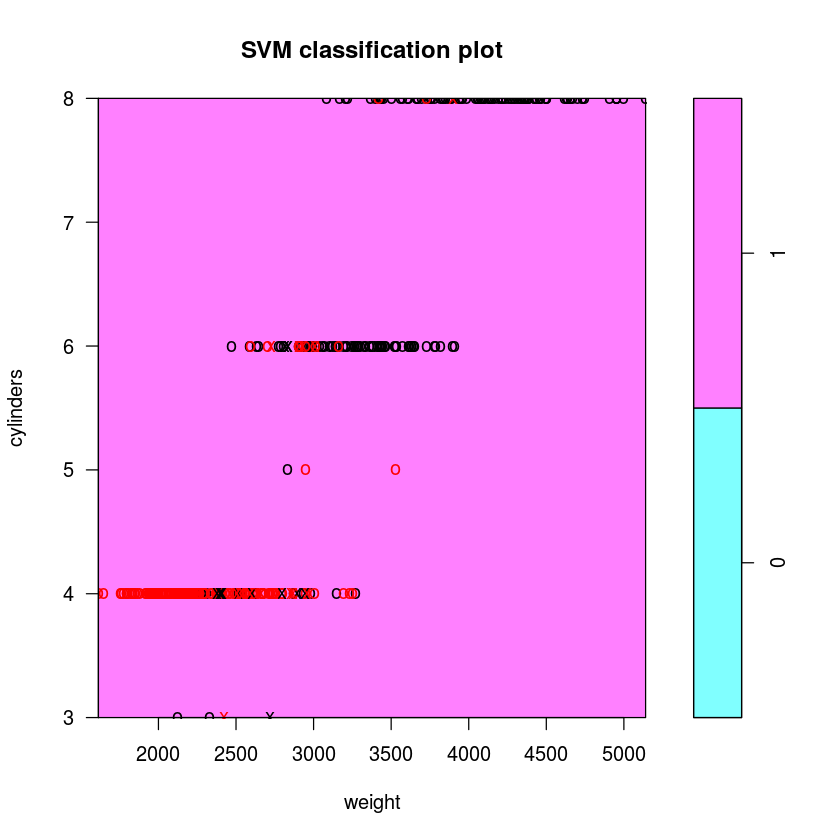

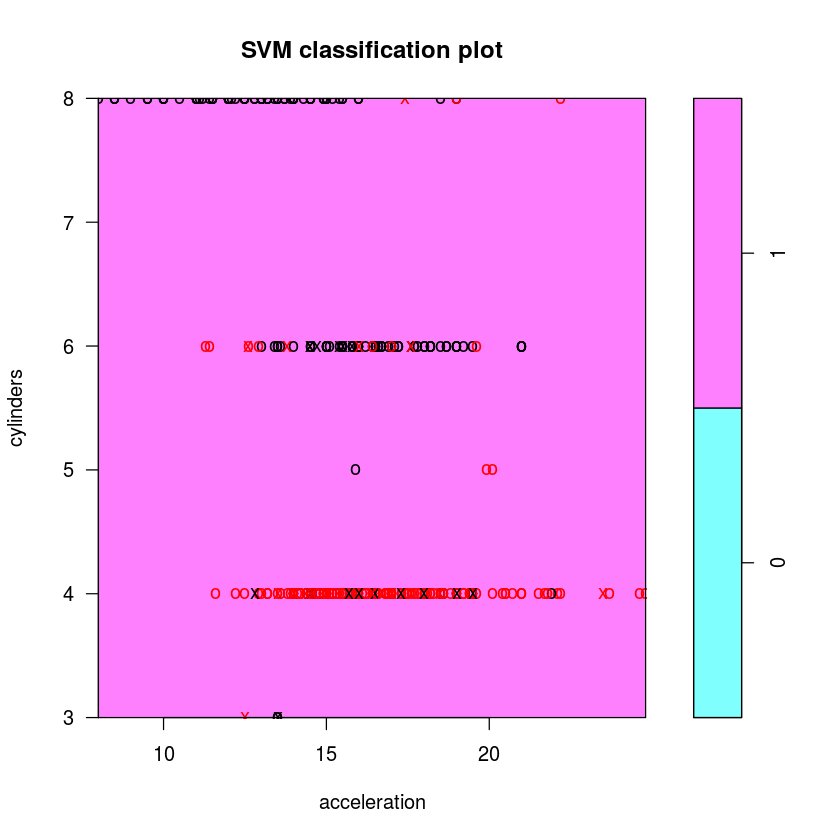

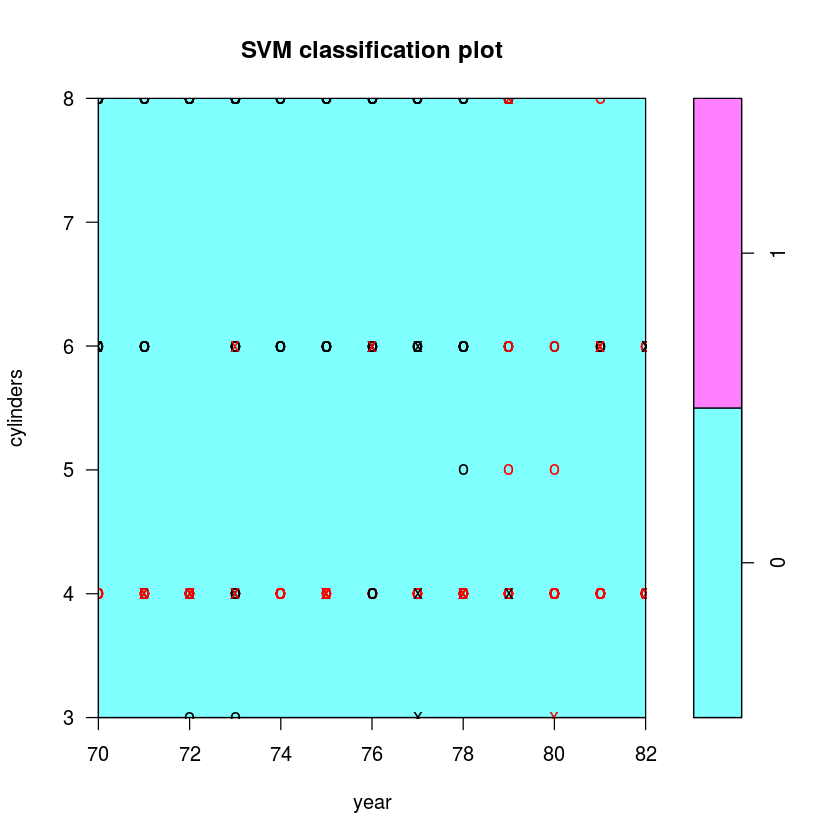

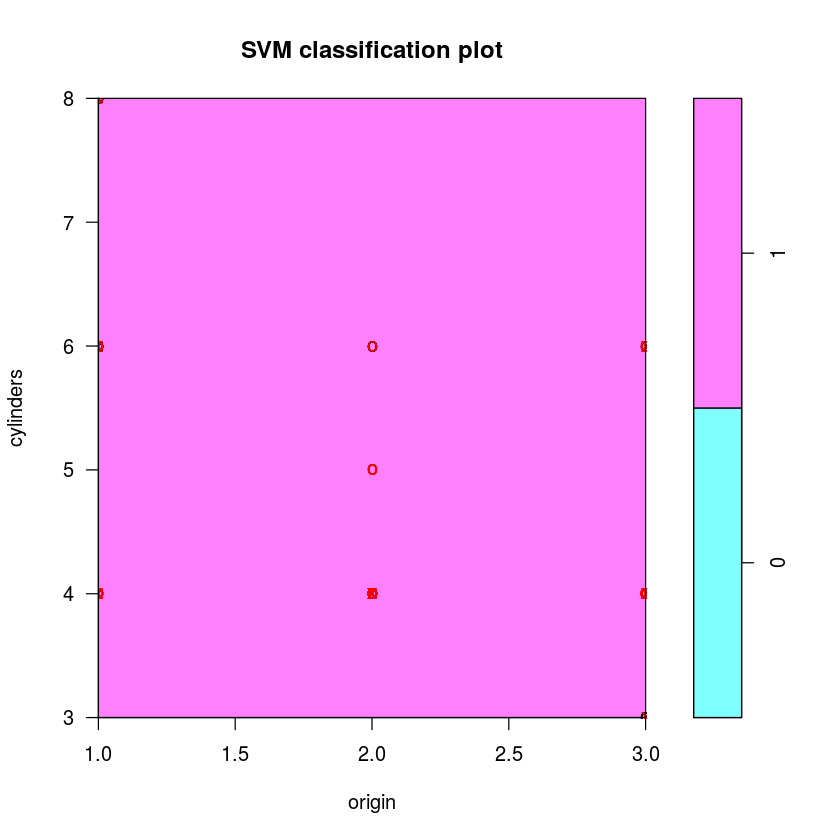

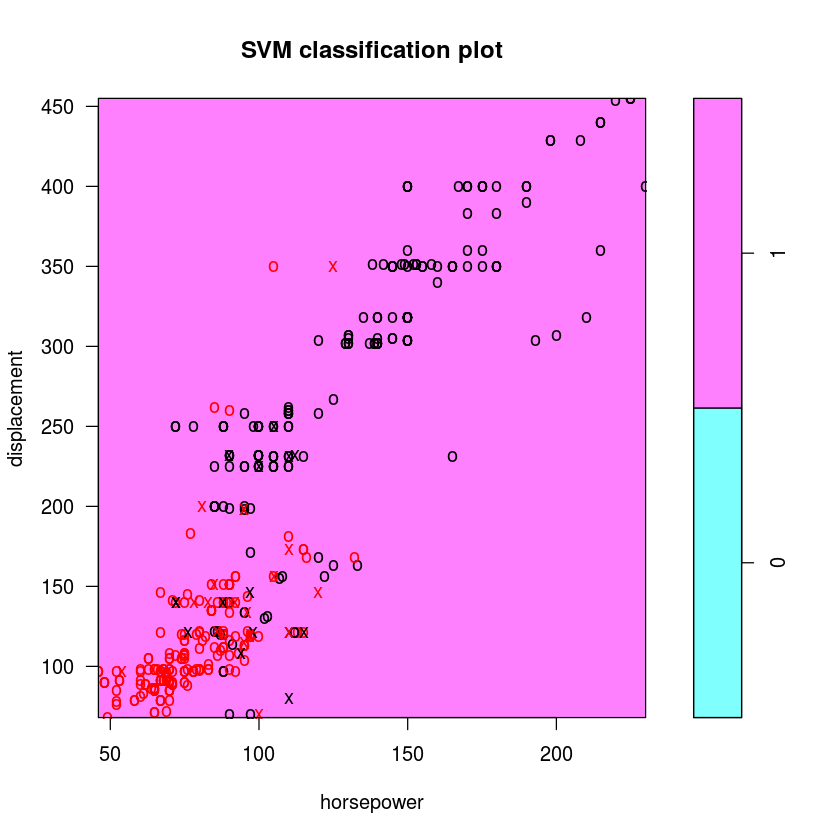

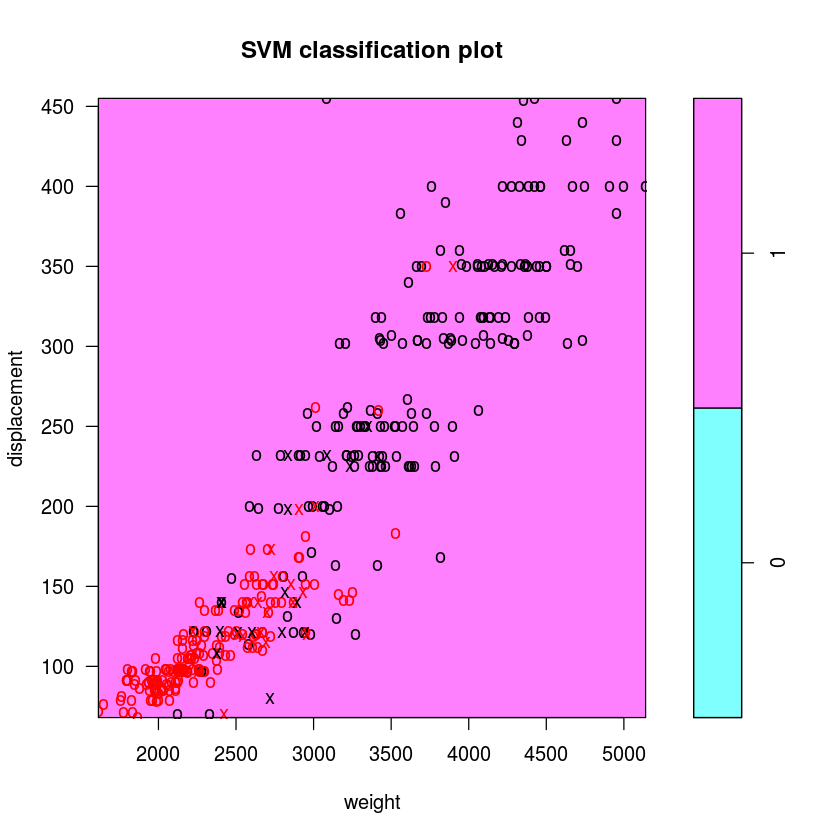

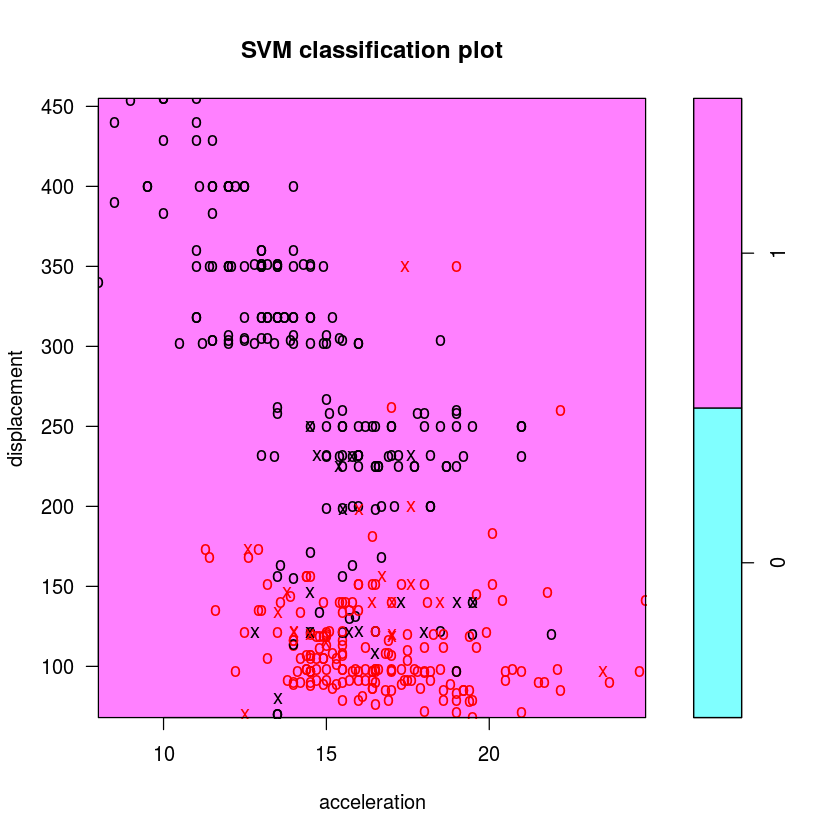

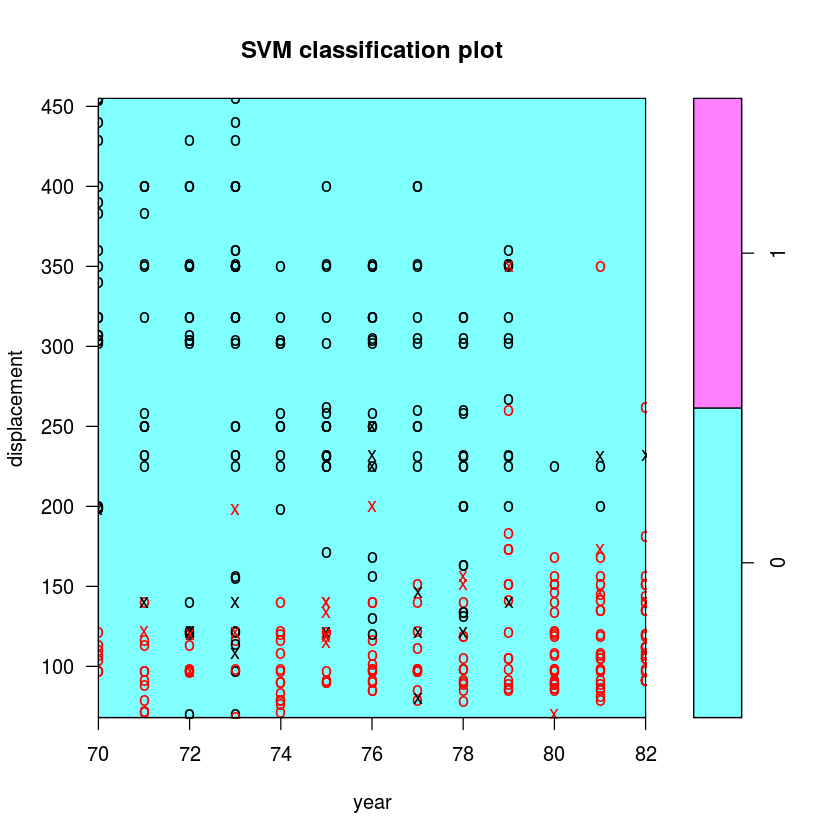

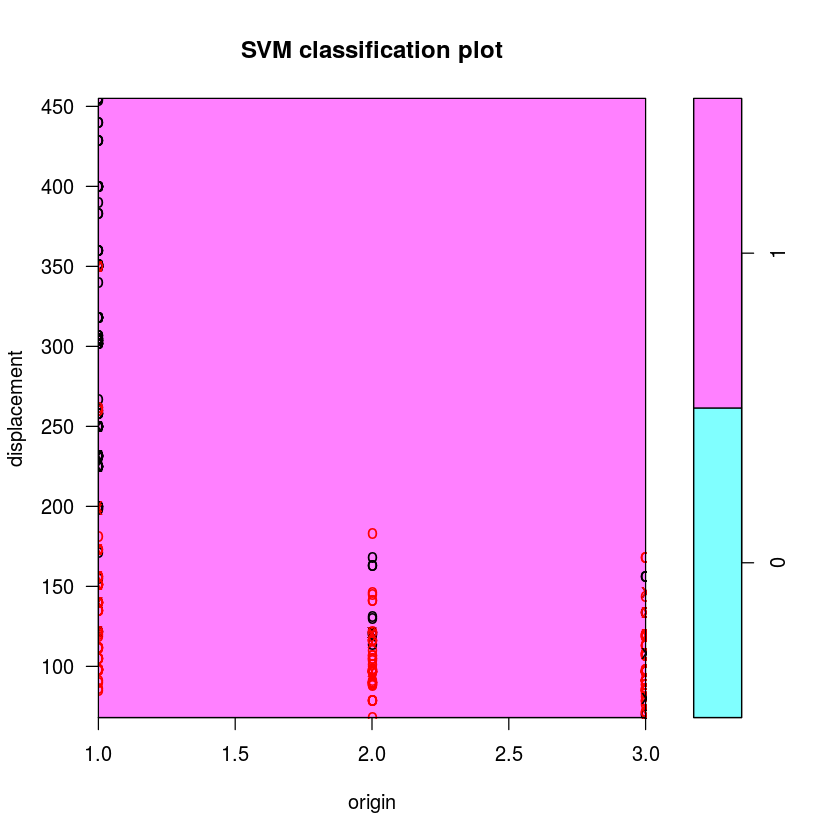

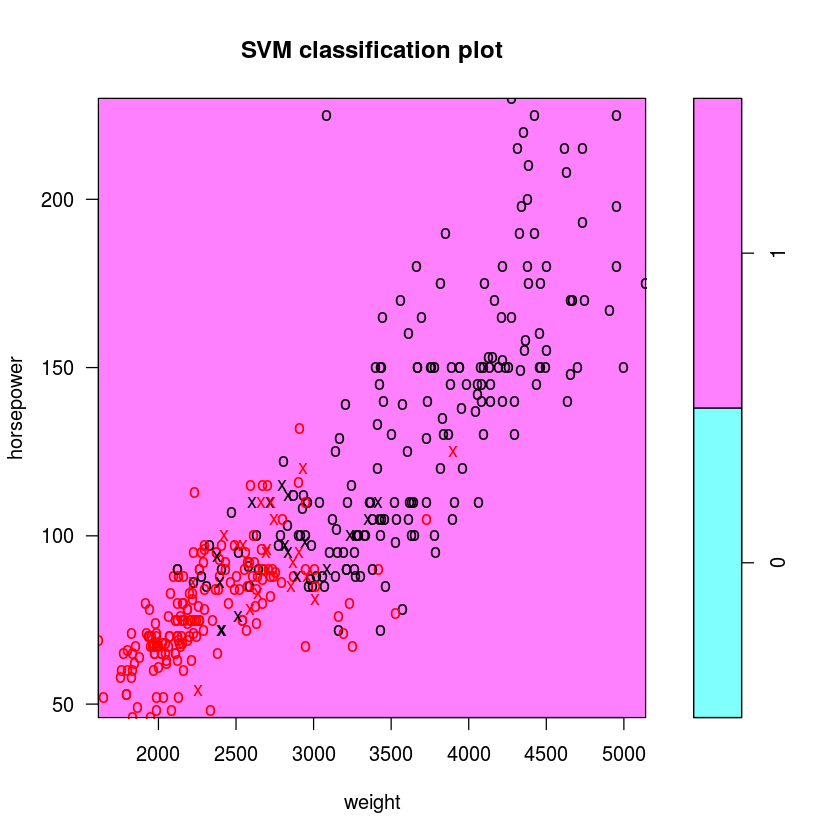

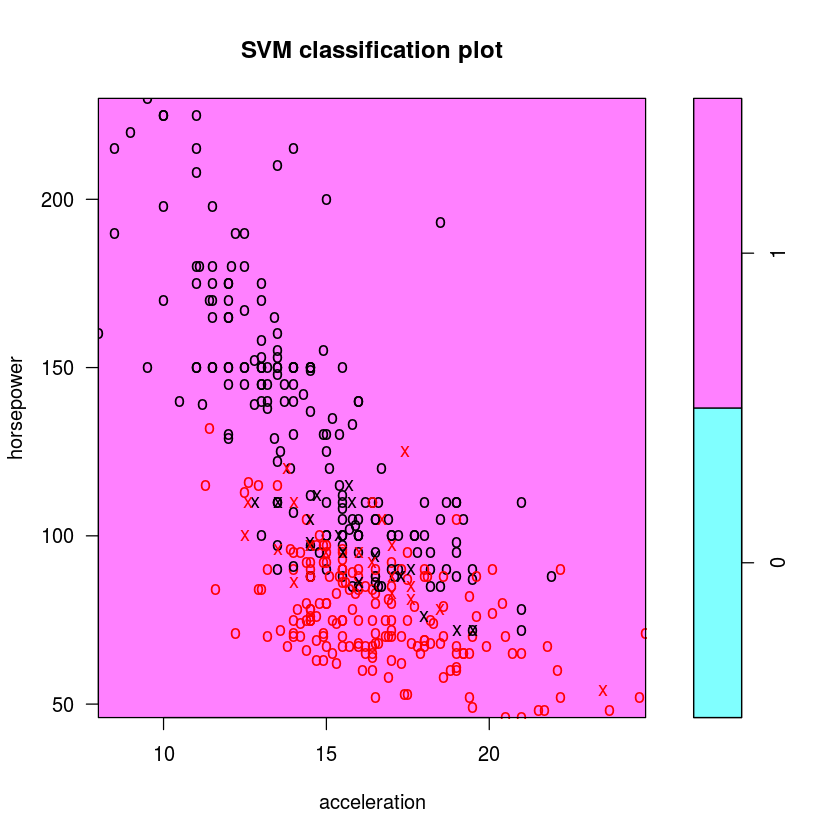

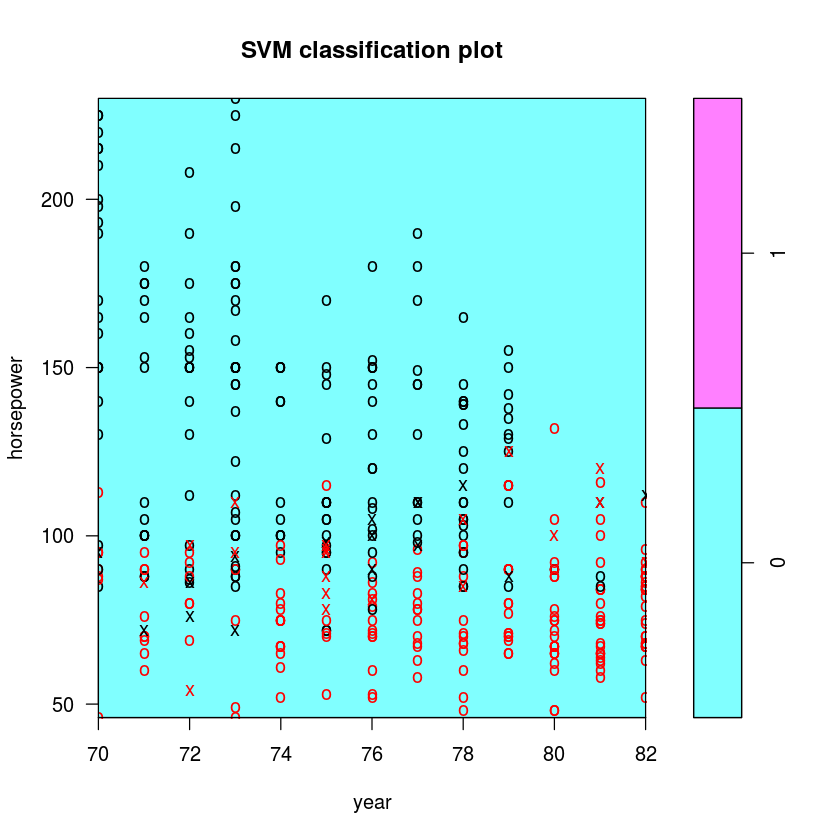

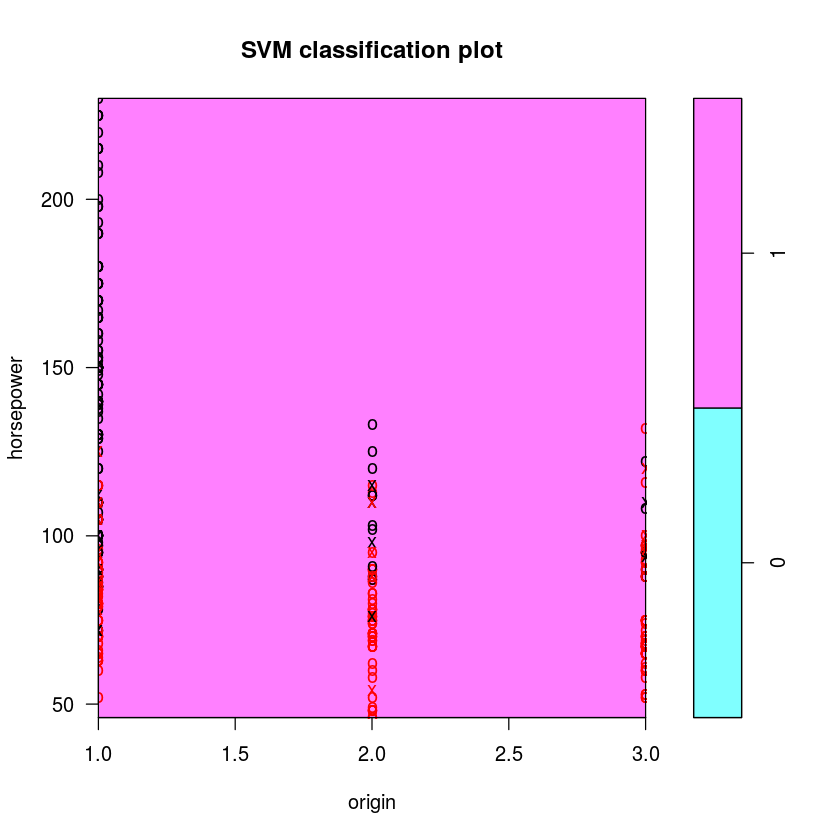

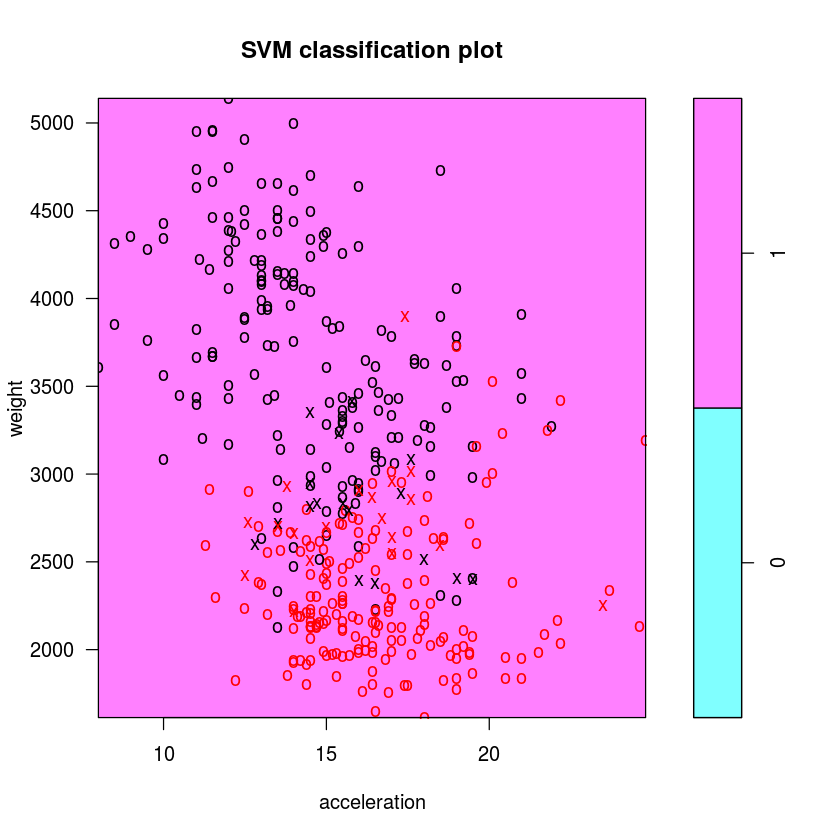

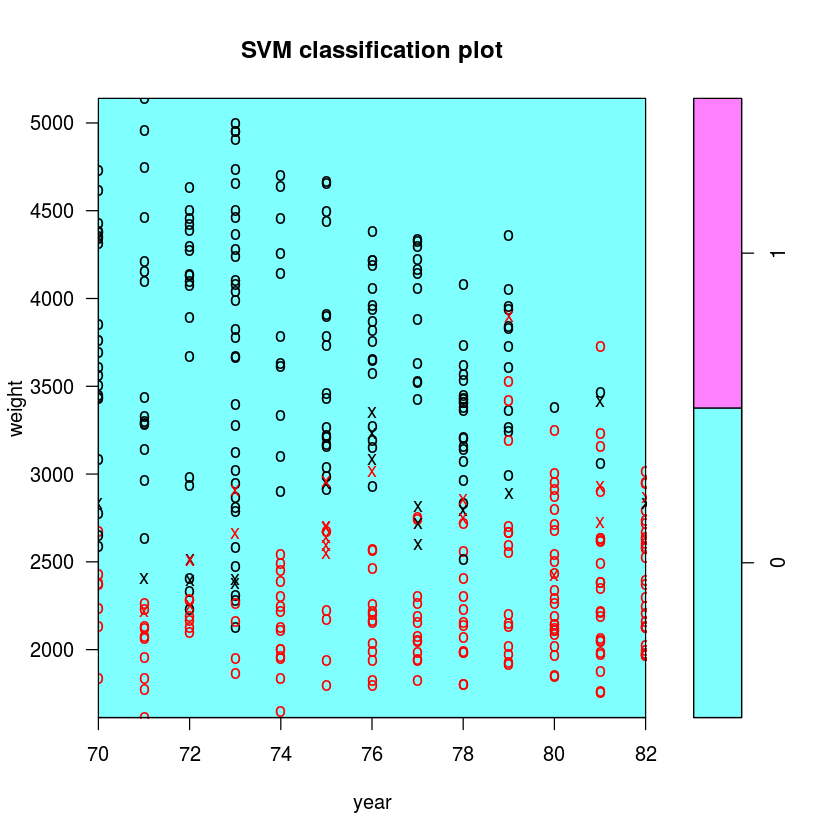

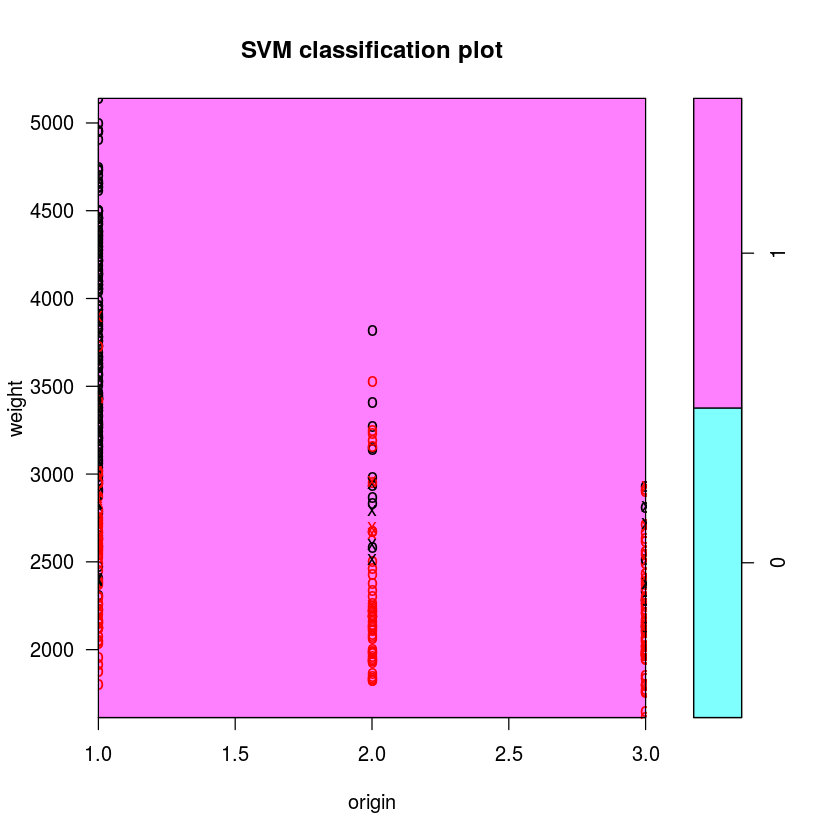

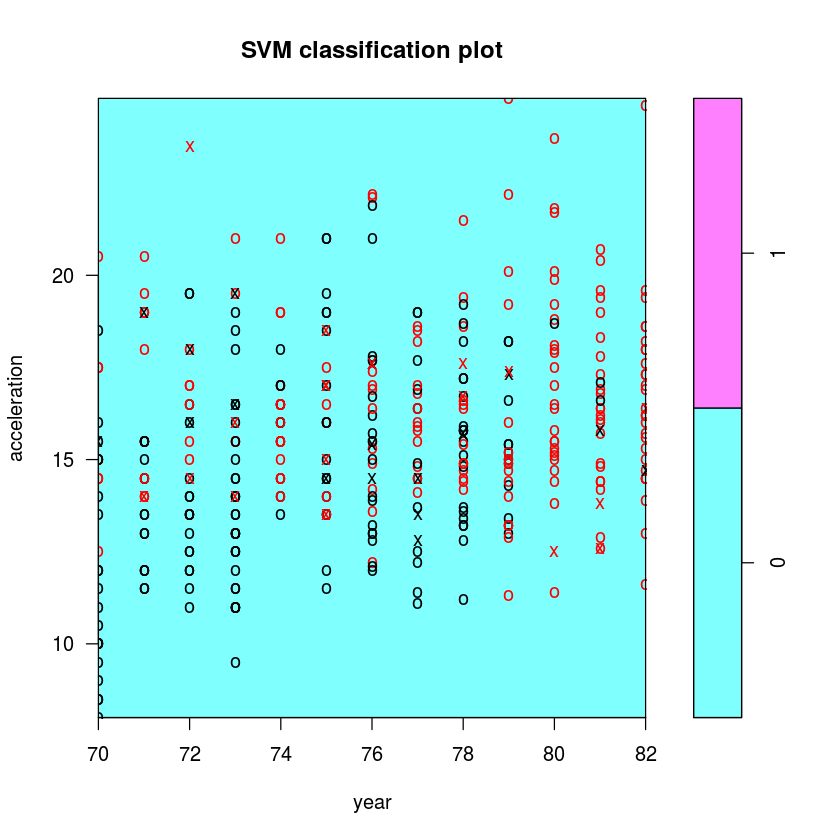

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, : ‘min’ not meaningful for factors


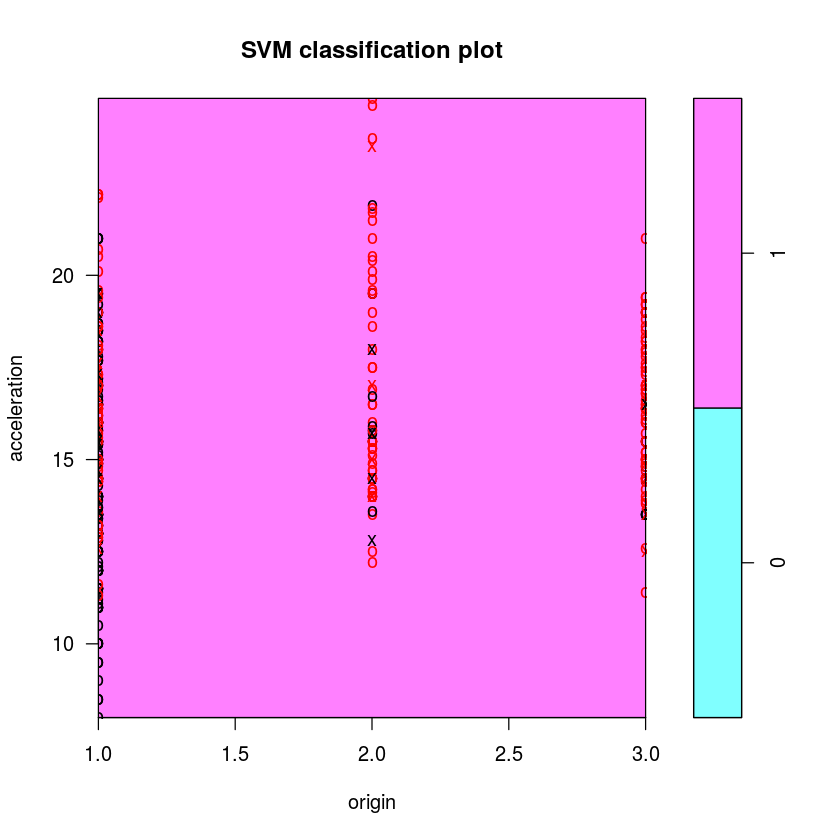

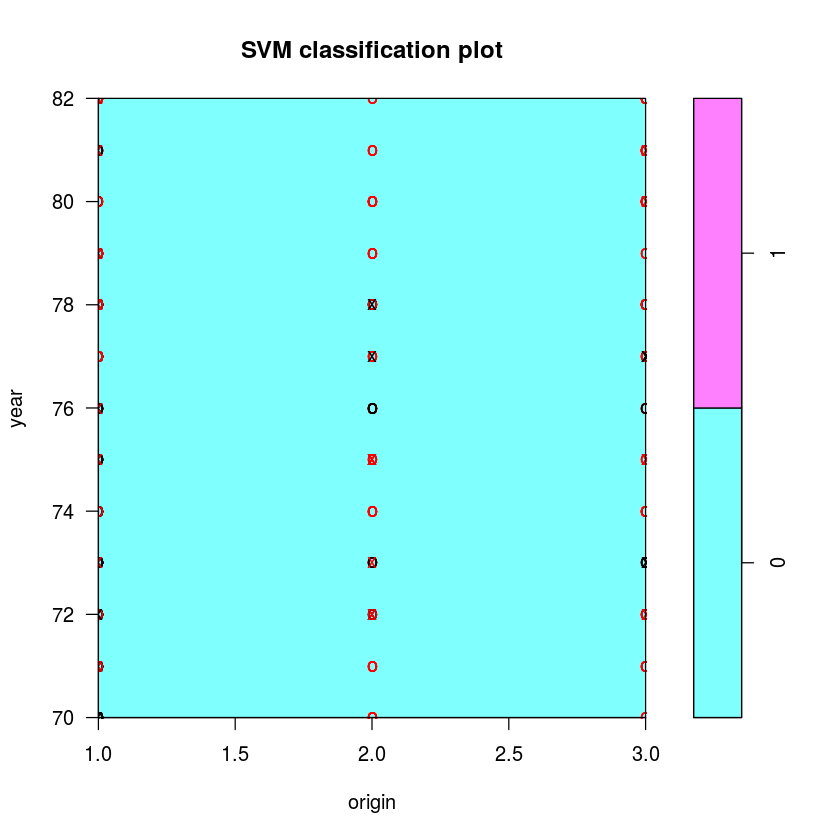

In [21]:
plotpairs(svm.radial)

## Task 3 

This problem involves the OJ data set which is part of the ISLR package. 

### (a) Create data

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations. 

In [22]:
library(ISLR)

set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

### (b) Support vector classifier

Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained. 

In [23]:
# with “Purchase” as the response and the other variables as predictors.
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  432

 ( 215 217 )


Number of Classes:  2 

Levels: 
 CH MM




#### Support vector classifier creates 432 support vectors out of 800 training points. Out of these, 217 belong to level MM and remaining 215 belong to level CH.

### (c) Test error rate.

What are the training and test error rates?

In [24]:
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 439  55
  MM  78 228

In [25]:
mean(OJ.train$Purchase!=train.pred)

[1] 0.16625

In [26]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 141  18
  MM  31  80

In [27]:
mean(OJ.test$Purchase!=test.pred)

[1] 0.1814815

#### The training error rate is 16.6% and test error rate is about 18.1%.

### (d) Cross-validation

Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10. 

In [28]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17125 0.05172376
2   0.01778279 0.16500 0.05197489
3   0.03162278 0.16625 0.04604120
4   0.05623413 0.16500 0.04594683
5   0.10000000 0.16250 0.04787136
6   0.17782794 0.16250 0.04249183
7   0.31622777 0.16875 0.04379958
8   0.56234133 0.16625 0.03998698
9   1.00000000 0.16500 0.03670453
10  1.77827941 0.16625 0.03682259
11  3.16227766 0.16500 0.03717451
12  5.62341325 0.16500 0.03525699
13 10.00000000 0.16750 0.03917553


In [29]:
tune.out$best.parameters

cost
5 0.1

#### We may see that the optimal cost is 0.1

### (e) Training and test error

Compute the training and test error rates using this new value for cost.

In [30]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 438  56
  MM  71 235

In [31]:
mean(OJ.train$Purchase!=train.pred)

[1] 0.15875

In [32]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 140  19
  MM  32  79

In [33]:
mean(OJ.test$Purchase!=test.pred)

[1] 0.1888889

#### We may see that, with the best cost, the training error rate is now 15.8% and the test error rate is 18.8%.

### f)  SVM with radial kernel

Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.

In [34]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  379

 ( 188 191 )


Number of Classes:  2 

Levels: 
 CH MM




In [35]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)


    train.pred
      CH  MM
  CH 455  39
  MM  77 229

In [36]:
mean(OJ.train$Purchase!= train.pred)

[1] 0.145

In [37]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)


    test.pred
      CH  MM
  CH 141  18
  MM  28  83

In [38]:
mean(OJ.test$Purchase!=test.pred)

[1] 0.1703704

#### Radial kernel with default gamma creates 379 support vectors, out of which, 188 belong to level CH and remaining 191 belong to level MM. The classifier has a training error of 14.5% and a test error of 17% which is a slight improvement over linear kernel. We now use cross validation to find optimal cost.


In [39]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.16625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38250 0.04533824
2   0.01778279 0.38250 0.04533824
3   0.03162278 0.37500 0.04894725
4   0.05623413 0.21500 0.05886661
5   0.10000000 0.17875 0.04860913
6   0.17782794 0.17875 0.05497790
7   0.31622777 0.17875 0.05981743
8   0.56234133 0.17250 0.05458174
9   1.00000000 0.16625 0.05001736
10  1.77827941 0.16875 0.05008673
11  3.16227766 0.17500 0.04787136
12  5.62341325 0.18000 0.05244044
13 10.00000000 0.18250 0.05596378


Train the model again with best.parameter of cost.

In [40]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  379

 ( 188 191 )


Number of Classes:  2 

Levels: 
 CH MM




In [41]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 455  39
  MM  77 229

In [42]:
mean(OJ.train$Purchase!=train.pred)

[1] 0.145

In [43]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 141  18
  MM  28  83

In [44]:
mean(OJ.test$Purchase!=test.pred)

[1] 0.1703704

#### Tuning does not reduce train and test error rates as we already used the optimal cost of 1.

### (g) SVM with polynomial kernel

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2. 

In [45]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  454

 ( 224 230 )


Number of Classes:  2 

Levels: 
 CH MM




In [46]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 461  33
  MM 105 201

In [47]:
mean(OJ.train$Purchase!= train.pred)

[1] 0.1725

In [48]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 149  10
  MM  41  70

In [49]:
mean(OJ.test$Purchase!= test.pred)

[1] 0.1888889

#### Polynomial kernel with default gamma creates 454 support vectors, out of which, 224 belong to level CH and remaining 230 belong to level MM. The classifier has a training error of 17.2% and a test error of 18.8% which is no improvement over linear kernel. We now use cross validation to find optimal cost.


In [50]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.18125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38250 0.04533824
2   0.01778279 0.36750 0.04972145
3   0.03162278 0.36500 0.05458174
4   0.05623413 0.33375 0.05070681
5   0.10000000 0.32500 0.04677072
6   0.17782794 0.25875 0.05952649
7   0.31622777 0.21250 0.06123724
8   0.56234133 0.21250 0.05743354
9   1.00000000 0.19750 0.06687468
10  1.77827941 0.19375 0.05376453
11  3.16227766 0.19625 0.05653477
12  5.62341325 0.18375 0.05434266
13 10.00000000 0.18125 0.05245699


In [51]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  342

 ( 170 172 )


Number of Classes:  2 

Levels: 
 CH MM




In [52]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 450  44
  MM  72 234

In [53]:
mean(OJ.train$Purchase!= train.pred)

[1] 0.145

In [54]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 140  19
  MM  31  80

In [55]:
mean(OJ.test$Purchase!= test.pred)

[1] 0.1851852

#### Tuning reduce train and test error rates.

#### Summary

h) Overall, which approach seems to give the best results on this data ?


Overall, radial basis kernel seems to be producing minimum misclassification error on both train and test data.